This EDA is to explore and testing many preprocessing method, not final preprocessing

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
RED = '#E38E39'
BLUE = '#1F509A'
LBLUE = '#d4ebf8'
# pd.set_option('display.max_rows', None)

# I. Import data

In [5]:
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')


# II. EDA


## 1.Check data

In [ ]:
def check_data(dataframe):
    # Check shape
    print(f"Shape: {dataframe.shape}\n")
    print('-' * 50)
    # Check for duplicates
    print(f"Duplicates: {dataframe.duplicated().sum()}\n")
    print('-' * 50)
    # Check for missing values
    print('Missing value')
    df_temp = dataframe.isnull().sum().reset_index()
    df_temp['% missing'] = df_temp.iloc[:, 1] / len(dataframe) * 100
    print(df_temp)
    print('-' * 50)
    # Describe numeric columns
    if not dataframe.select_dtypes(exclude='object').empty:
        print("Descriptive Statistics for Numeric Columns:\n", dataframe.describe(include=[float, int]), "\n")
        print('-' * 50)
    # Describ   print('-' * 50)e object (categorical) columns
    if not dataframe.select_dtypes(include='object').empty:
        print("Descriptive Statistics for Categorical Columns:\n", dataframe.describe(include=[object]), "\n")
        print('-' * 50)
    # Check data types
    print("Data Types:\n", dataframe.dtypes, "\n")
    print('-' * 50)
    # Check unique values for each column
    unique_counts = dataframe.nunique()
    print("Unique Values Count:\n", unique_counts, "\n")
    print('-' * 50)
    # Values count
    for col in dataframe.columns:
        print(dataframe[col].value_counts().head())
        print('-' * 30)


In [ ]:
check_data(train)

Shape: (246009, 122)

--------------------------------------------------
Duplicates: 0

--------------------------------------------------
Missing value
                            index       0  % missing
0                          TARGET       0   0.000000
1              NAME_CONTRACT_TYPE       0   0.000000
2                     CODE_GENDER       0   0.000000
3                    FLAG_OWN_CAR       0   0.000000
4                 FLAG_OWN_REALTY       0   0.000000
5                    CNT_CHILDREN       0   0.000000
6                AMT_INCOME_TOTAL       0   0.000000
7                      AMT_CREDIT       0   0.000000
8                     AMT_ANNUITY      10   0.004065
9                 AMT_GOODS_PRICE     224   0.091054
10                NAME_TYPE_SUITE    1046   0.425188
11               NAME_INCOME_TYPE       0   0.000000
12            NAME_EDUCATION_TYPE       0   0.000000
13             NAME_FAMILY_STATUS       0   0.000000
14              NAME_HOUSING_TYPE       0   0.000000

In [ ]:
check_data(test)

Shape: (61502, 121)

--------------------------------------------------
Duplicates: 0

--------------------------------------------------
Missing value
                       index      0  % missing
0         NAME_CONTRACT_TYPE      0   0.000000
1                CODE_GENDER      1   0.001626
2               FLAG_OWN_CAR      0   0.000000
3            FLAG_OWN_REALTY      0   0.000000
4               CNT_CHILDREN      0   0.000000
..                       ...    ...        ...
116              YEARS_BIRTH      0   0.000000
117           YEARS_EMPLOYED  11050  17.966895
118       YEARS_REGISTRATION      0   0.000000
119         YEARS_ID_PUBLISH      0   0.000000
120  YEARS_LAST_PHONE_CHANGE      0   0.000000

[121 rows x 3 columns]
--------------------------------------------------
Descriptive Statistics for Numeric Columns:
        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  61502.000000      6.150200e+04  6.150200e+04   61500.000000   
mean       0.420344     

In [ ]:
cat_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE'
,'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'
,'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE'
,'FLAG_EMAIL','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'
,'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION'
,'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE'
,'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6'
,'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10'
,'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15'
,'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19'
,'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21', 'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

tar_col = ['SK_ID_CURR', 'TARGET']
num_col = [col for col in train.columns if col not in cat_col + tar_col]

In [ ]:
print(f'# cat col: {len(cat_col)}')
print(f'# num col: {len(num_col)}')

# cat col: 49
# num col: 71


## 2.Observe Distribution

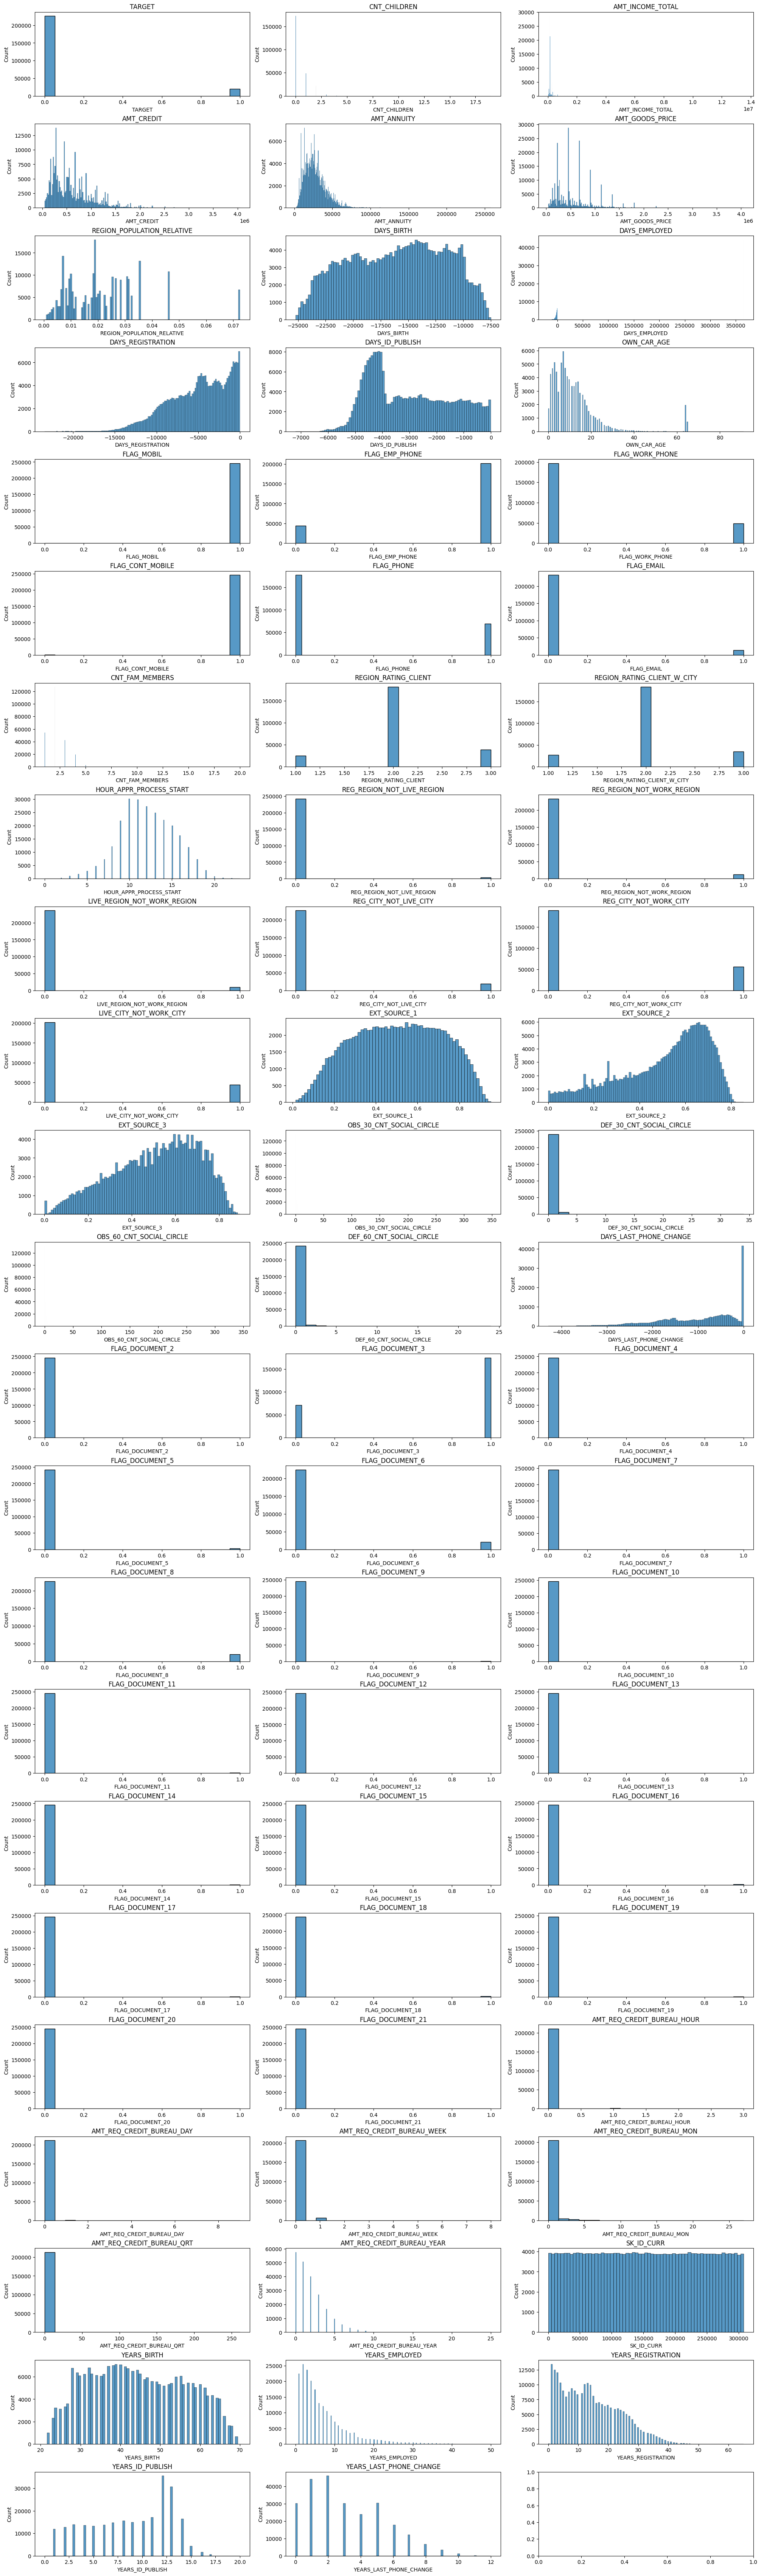

In [ ]:
cols_to_plot = train.select_dtypes('number').columns.tolist()
ncol, nrow = 3, len(cols_to_plot)//3 + 1

fig , axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, len(cols_to_plot)), constrained_layout=True)

for ax, column in zip(axes.flatten(), cols_to_plot): 
    sns.histplot(train[column], ax=ax)
    ax.set_title(column)

plt.show()

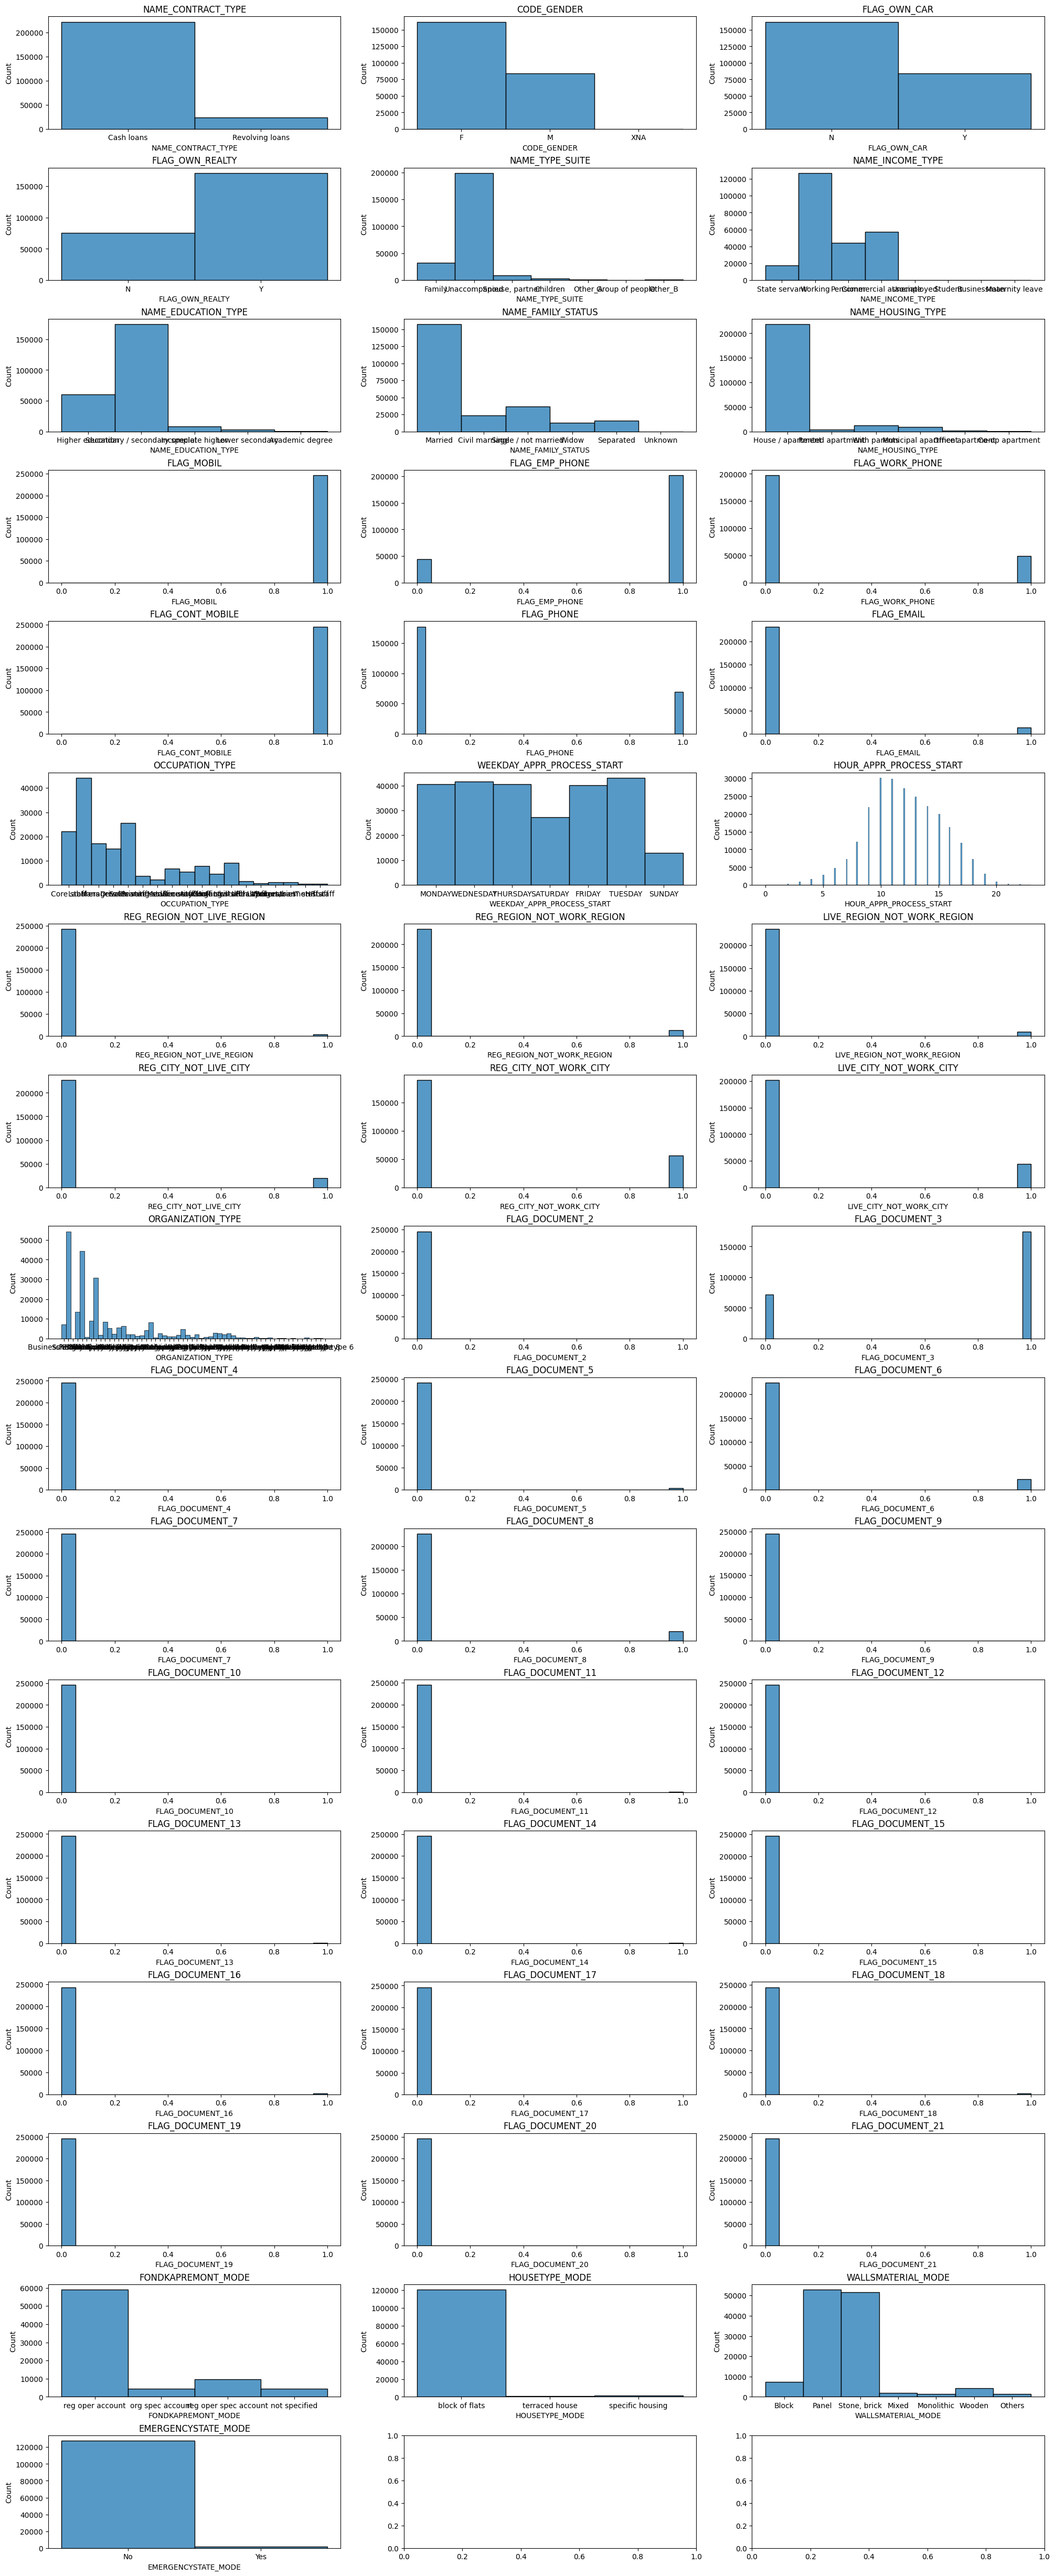

In [ ]:
cols_to_plot = train.select_dtypes('object').columns.tolist()
ncol, nrow = 3, len(cols_to_plot)//3 + 1

fig , axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, len(cols_to_plot)), constrained_layout=True)

for ax, column in zip(axes.flatten(), cols_to_plot): 
    sns.histplot(train[column], ax=ax)
    ax.set_title(column)

plt.show()

In [85]:
train['OCCUPATION_TYPE'].value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                 0.261701
Sales staff              0.151697
Core staff               0.130501
Managers                 0.101626
Drivers                  0.088133
High skill tech staff    0.054351
Accountants              0.046465
Medicine staff           0.040360
Security staff           0.031823
Cooking staff            0.027756
Cleaning staff           0.022036
Private service staff    0.012522
Low-skill Laborers       0.009810
Waiters/barmen staff     0.006341
Secretaries              0.006270
Realty agents            0.003529
HR staff                 0.002646
IT staff                 0.002433
Name: proportion, dtype: float64

C:\Users\trong\AppData\Local\Temp\ipykernel_23668\1972956749.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train.loc[train['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol], color=BLUE)
C:\Users\trong\AppData\Local\Temp\ipykernel_23668\1972956749.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train.loc[train['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol], color=RED)
C:\Users\trong\AppData\Local\Temp\ipykernel_23668\1972956749.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i//ncol, i%ncol].legend()
C:\Users\trong\AppData\Local\Temp\ipykernel_23668\1972956749.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=Fal

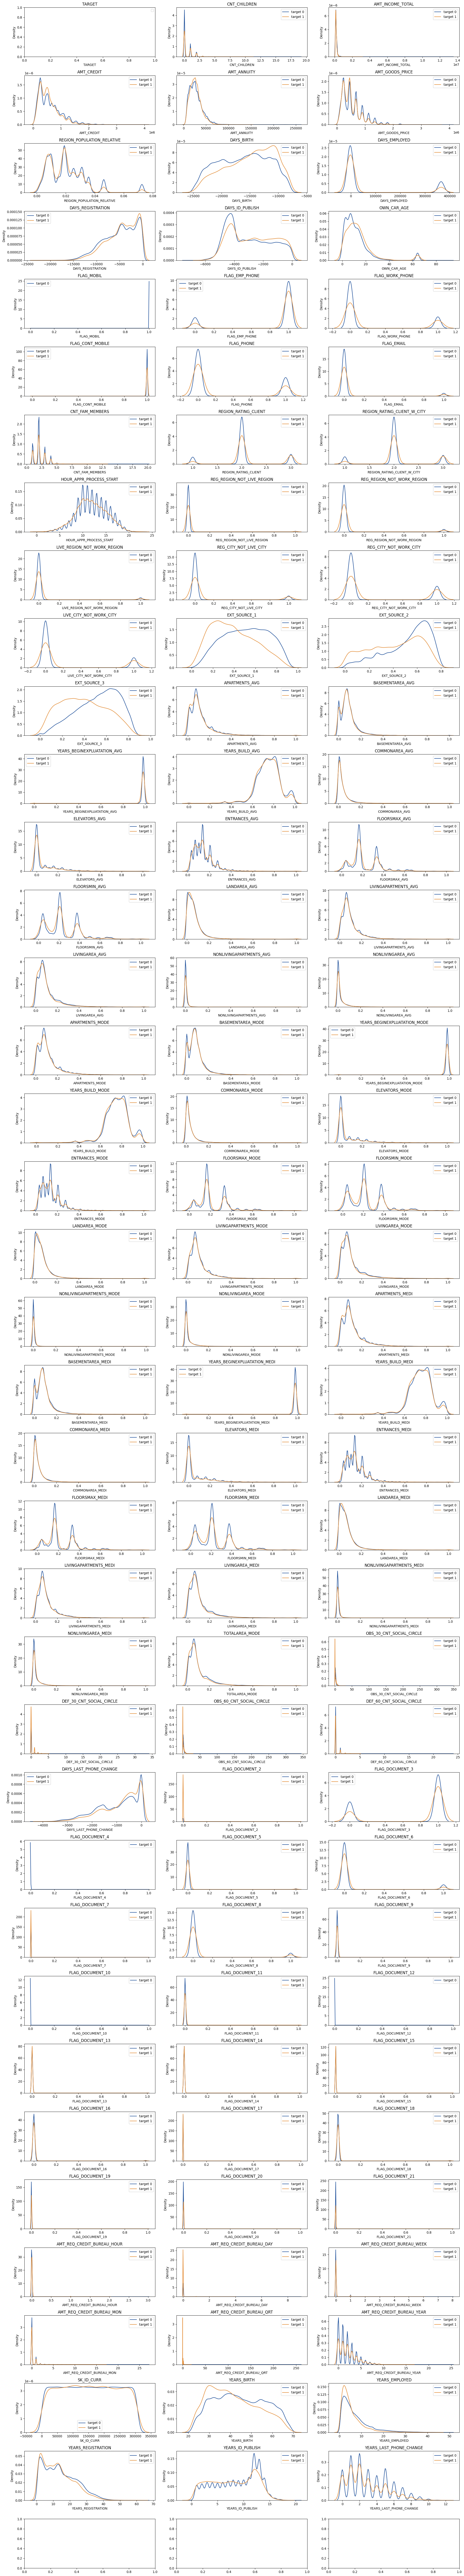

In [40]:
# Plot the distribution of the numerical features with hue = target
cols_to_plot = train.select_dtypes('number').columns
ncol, nrow = 3, len(cols_to_plot)//3 + 1
fig, ax = plt.subplots(nrow, ncol, figsize=(20, len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    # kde plot
    sns.kdeplot(train.loc[train['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol], color=BLUE)
    sns.kdeplot(train.loc[train['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol], color=RED)
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].legend()

plt.tight_layout()
plt.show()

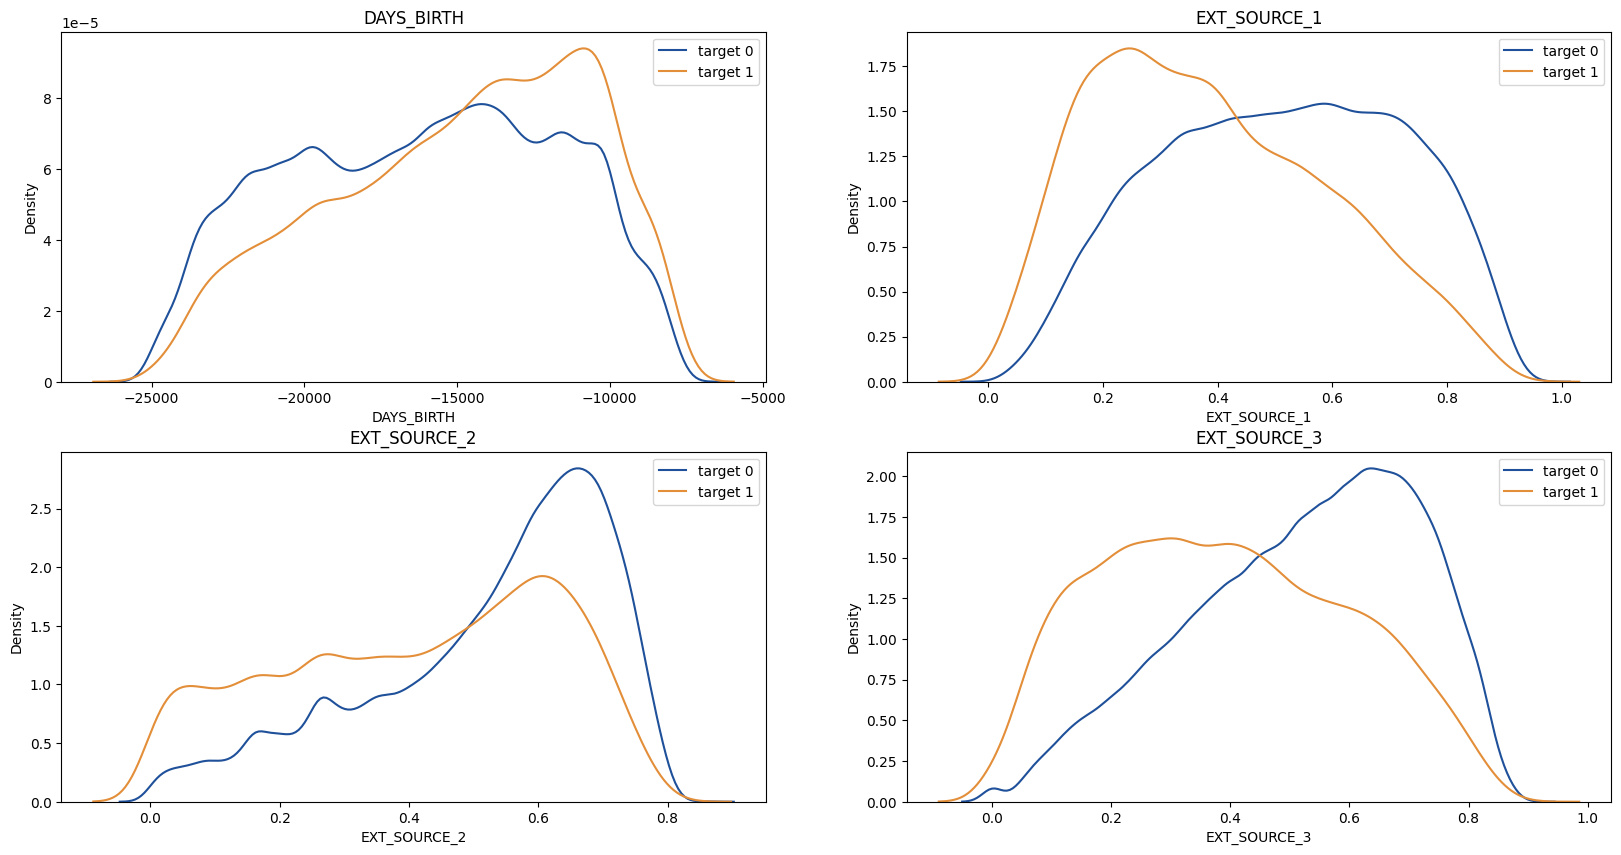

In [43]:
cols_to_plot = ['DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
ncol, nrow = 2, len(cols_to_plot)//2 + 1
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 10))

for i, col in enumerate(cols_to_plot):
    # kde plot
    sns.kdeplot(train.loc[train['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol], color=BLUE)
    sns.kdeplot(train.loc[train['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol], color=RED)
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].legend()


- Độ tuổi đăng kí vay nhiều nhất nằm vào khoảng 20-40 tuổi cho cả 2 tệp khách hàng.
- 3 biến EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 là 3 biến có distribution khác nhau ở 2 class 0 và 1, có khả năng phân tách tốt nhất, đặc biệt là EXT_SOURCE_3.
- Các features còn lại có distribution tương đối giống nhau.
OBS_60_CNT_SOCIAL_CIRCLE và OBS_30_CNT_SOCIAL_CIRCLE là 2 features giống hệt nhau.

<Axes: ylabel='proportion'>

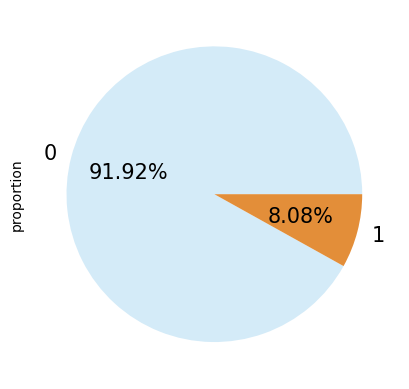

In [38]:
train['TARGET'].value_counts(normalize=True).plot(
    kind='pie', 
    autopct='%.2f%%', 
    colors=['#d4ebf8', RED],  # Target=0 will be blue, Target=1 will be red
    textprops={'size': 15}
)

Plotting 34 columns: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_CURR', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']


C:\Users\trong\AppData\Local\Temp\ipykernel_23668\55569707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=train, ax=ax[i//ncol, i%ncol], palette=[LBLUE, RED])
C:\Users\trong\AppData\Local\Temp\ipykernel_23668\55569707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=train, ax=ax[i//ncol, i%ncol], palette=[LBLUE, RED])
C:\Users\trong\AppData\Local\Temp\ipykernel_23668\55569707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=train, ax=ax[i//ncol, i%ncol], pa

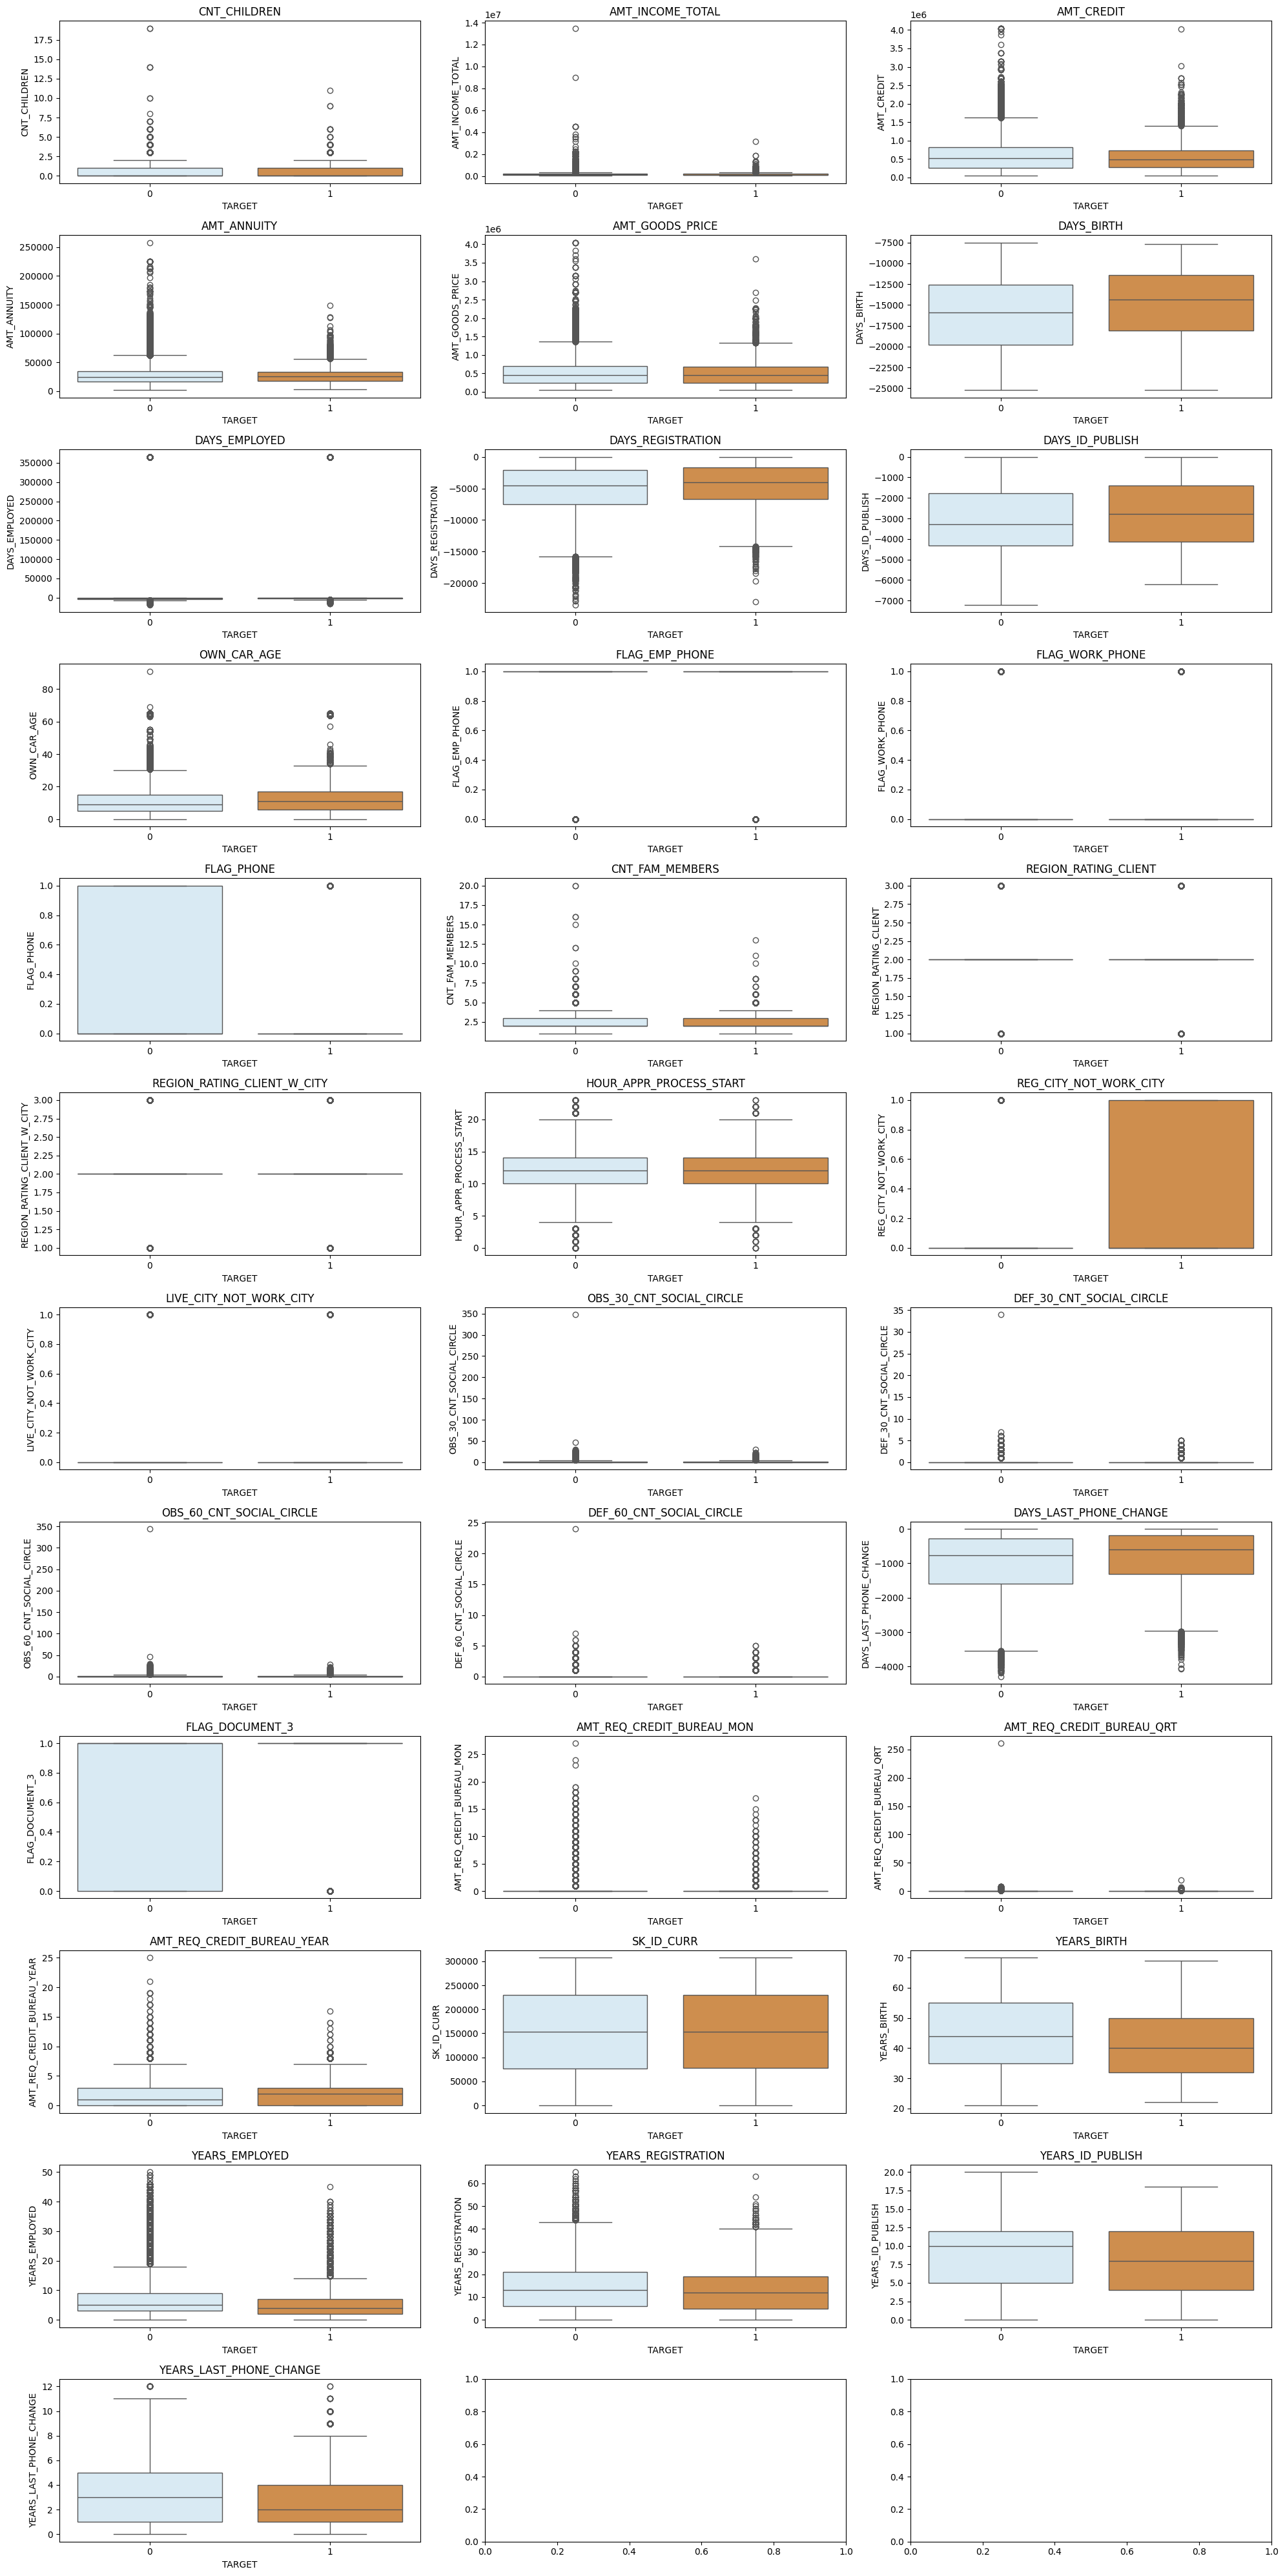

In [53]:
# Boxplot of numerical features with hue = target
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cat_cols = train.select_dtypes(include='object').columns.tolist()

cols_to_plot = train[num_cols].var()[train[num_cols].var() > 0.1].index.tolist()
print(f'Plotting {len(cols_to_plot)} columns: {cols_to_plot}')
ncol, nrow = 3, len(cols_to_plot)//3 + 1
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 40))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(x='TARGET', y=col, data=train, ax=ax[i//ncol, i%ncol], palette=[LBLUE, RED])
    ax[i//ncol, i%ncol].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(df):
    outlier_data = []

    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)  # First quartile
        q3 = df[column].quantile(0.75)  # Third quartile
        iqr = q3 - q1                   # Interquartile range
        
        # Define outlier bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Detect outliers
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
        num_outliers = outliers.sum()   # Number of outliers
        perc_outliers = (num_outliers / len(df)) * 100  # Percentage of outliers
        
        outlier_data.append({
            'Column': column,
            'Number of Outliers': num_outliers,
            '% of Outliers': perc_outliers
        })
    
    return pd.DataFrame(outlier_data)

In [66]:
outlier_df = detect_outliers_iqr(train)

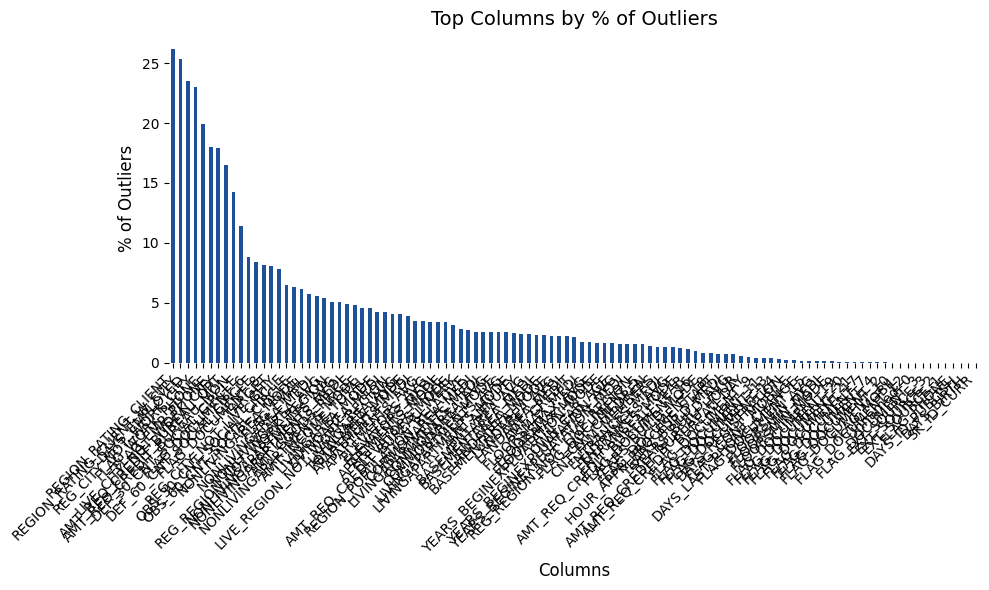

In [83]:
# outlier_df[['Column', '% of Outliers']].sort_values('% of Outliers', ascending=False).head(10)  # Limit to the top 10 columns with the highest % of outlie.plot(kind='bar', x='Column', y='% of Outliers', figsize=(10, 6), legend=False, color='skyblue')
# outlier_df[['Column', '% of Outliers']].sort_values('% of Outliers', ascending=False).plot(kind='bar')

ax = outlier_df[['Column', '% of Outliers']].sort_values('% of Outliers', ascending=False).plot(kind='bar', x='Column', y='% of Outliers', figsize=(10, 6), legend=False, color=BLUE)

plt.title('Top Columns by % of Outliers', fontsize=14)
plt.ylabel('% of Outliers', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Remove chart spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()  # Ensure proper layout
plt.show()
# # Adjust labels and aesthetics


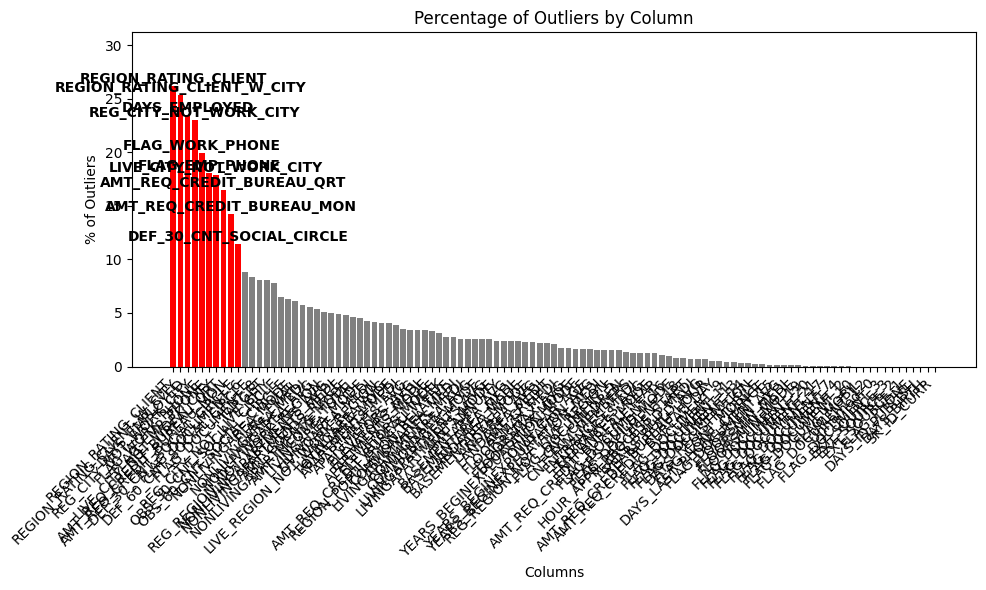

In [65]:
import matplotlib.pyplot as plt

def plot_outliers_iqr(df):
    """
    Detects outliers in a dataframe using the IQR method and plots the results.

    Parameters:
    df (pd.DataFrame): Input dataframe.

    Returns:
    None: Displays a bar chart of the number of outliers.
    """
    # Call the outlier detection function
    outlier_data = detect_outliers_iqr(df)
    
    # Sort by % of Outliers in descending order
    outlier_data = outlier_data.sort_values(by='% of Outliers', ascending=False)
    
    # Create a color list based on % of Outliers
    colors = ['red' if perc > 10 else 'grey' for perc in outlier_data['% of Outliers']]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(outlier_data['Column'], outlier_data['% of Outliers'], color=colors)
    
    # Annotate bars with column names for those with % > 10%
    for bar, perc, col in zip(bars, outlier_data['% of Outliers'], outlier_data['Column']):
        if perc > 10:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), col, 
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

    # Add labels and title
    plt.xlabel('Columns')
    plt.ylabel('% of Outliers')
    plt.title('Percentage of Outliers by Column')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(outlier_data['% of Outliers']) + 5)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_outliers_iqr(train)


## 3.Check for informal, invalid data, low variance

In [6]:
train = train.drop(columns='Unnamed: 0')
test = test.drop(columns='Unnamed: 0')

Informal: 
- change days variable to year variable

Invalid: 
- Days variable cannot > 0
- XNA in gender

In [7]:
# convert days to years type
def days_to_year(dataframe):
    print(f'Shape before process: {dataframe.shape}')
    for col in dataframe.columns[dataframe.columns.str.startswith('DAYS')]:
        dataframe[f'YEARS{col[4:]}'] = np.ceil(dataframe[col] / -365)
        # dataframe.drop(columns=col, inplace=True)
    print(f'Shape after process: {dataframe.shape}')
    return dataframe
train = days_to_year(train)
test = days_to_year(test)

Shape before process: (246009, 122)
Shape after process: (246009, 127)
Shape before process: (61502, 121)
Shape after process: (61502, 126)


In [8]:
# delete invalid in years var (< 0)
train[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']] = train[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']].applymap(lambda x: np.nan if x < 0 else x,)
test[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']] = test[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']].applymap(lambda x: np.nan if x < 0 else x,)

# delete invalid in gender
train['CODE_GENDER'] = np.where(train['CODE_GENDER'] == 'XNA', np.nan, train['CODE_GENDER'])
test['CODE_GENDER'] = np.where(test['CODE_GENDER'] == 'XNA', np.nan, test['CODE_GENDER'])

C:\Users\trong\AppData\Local\Temp\ipykernel_23712\2396793795.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']] = train[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']].applymap(lambda x: np.nan if x < 0 else x,)
C:\Users\trong\AppData\Local\Temp\ipykernel_23712\2396793795.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']] = test[['YEARS_BIRTH',	'YEARS_EMPLOYED',	'YEARS_REGISTRATION',	'YEARS_ID_PUBLISH']].applymap(lambda x: np.nan if x < 0 else x,)


## 4.Observe and fill missing value

### Missing value in train and test

<Axes: >

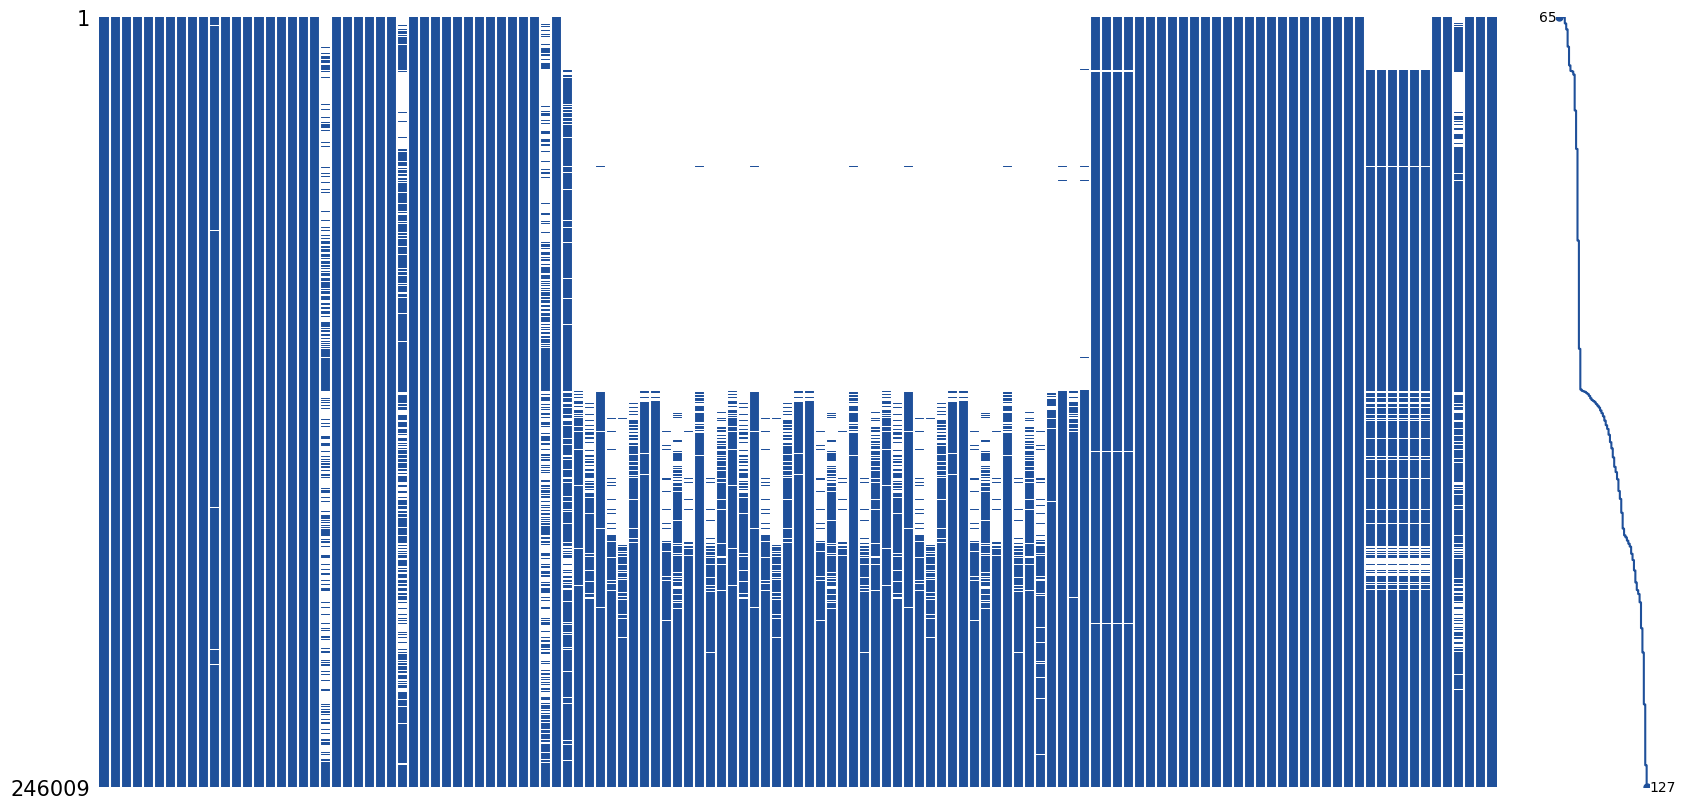

In [35]:
import missingno as msno
msno.matrix(train, sparkline=True, figsize=(20,10), sort='ascending', fontsize=12, labels=False, color=(31 / 255, 80 / 255, 154 / 255))

In [11]:
# Check Missing valuein train
print('Missing value')
df_temp = train.isnull().sum().reset_index()
df_temp['% missing'] = df_temp.iloc[:, 1] / len(train) * 100
df_temp.columns = ['Name', 'Count', '% Missing']
df_temp[df_temp['% Missing'] > 0]


Missing value


Name   Count  % Missing
2                     CODE_GENDER       3   0.001219
8                     AMT_ANNUITY      10   0.004065
9                 AMT_GOODS_PRICE     224   0.091054
10                NAME_TYPE_SUITE    1046   0.425188
20                    OWN_CAR_AGE  162188  65.927669
27                OCCUPATION_TYPE   77106  31.342756
28                CNT_FAM_MEMBERS       1   0.000406
40                   EXT_SOURCE_1  138525  56.308916
41                   EXT_SOURCE_2     529   0.215033
42                   EXT_SOURCE_3   48824  19.846428
43                 APARTMENTS_AVG  124984  50.804645
44               BASEMENTAREA_AVG  144016  58.540948
45    YEARS_BEGINEXPLUATATION_AVG  120082  48.812035
46                YEARS_BUILD_AVG  163684  66.535777
47                 COMMONAREA_AVG  171930  69.887687
48                  ELEVATORS_AVG  131209  53.335041
49                  ENTRANCES_AVG  123949  50.383929
50                  FLOORSMAX_AVG  122533  49.808340
51                  FLOORSMIN_AVG  166955  67.865403
52                   LANDAREA_AVG  146130  59.400266
53           LIVINGAPARTMENTS_AVG  168197  68.370263
54                 LIVINGAREA_AVG  123588  50.237186
55        NONLIVINGAPARTMENTS_AVG  170869  69.456402
56              NONLIVINGAREA_AVG  135944  55.259767
57                APARTMENTS_MODE  124984  50.804645
58              BASEMENTAREA_MODE  144016  58.540948
59   YEARS_BEGINEXPLUATATION_MODE  120082  48.812035
60               YEARS_BUILD_MODE  163684  66.535777
61                COMMONAREA_MODE  171930  69.887687
62                 ELEVATORS_MODE  131209  53.335041
63                 ENTRANCES_MODE  123949  50.383929
64                 FLOORSMAX_MODE  122533  49.808340
65                 FLOORSMIN_MODE  166955  67.865403
66                  LANDAREA_MODE  146130  59.400266
67          LIVINGAPARTMENTS_MODE  168197  68.370263
68                LIVINGAREA_MODE  123588  50.237186
69       NONLIVINGAPARTMENTS_MODE  170869  69.456402
70             NONLIVINGAREA_MODE  135944  55.259767
71                APARTMENTS_MEDI  124984  50.804645
72              BASEMENTAREA_MEDI  144016  58.540948
73   YEARS_BEGINEXPLUATATION_MEDI  120082  48.812035
74               YEARS_BUILD_MEDI  163684  66.535777
75                COMMONAREA_MEDI  171930  69.887687
76                 ELEVATORS_MEDI  131209  53.335041
77                 ENTRANCES_MEDI  123949  50.383929
78                 FLOORSMAX_MEDI  122533  49.808340
79                 FLOORSMIN_MEDI  166955  67.865403
80                  LANDAREA_MEDI  146130  59.400266
81          LIVINGAPARTMENTS_MEDI  168197  68.370263
82                LIVINGAREA_MEDI  123588  50.237186
83       NONLIVINGAPARTMENTS_MEDI  170869  69.456402
84             NONLIVINGAREA_MEDI  135944  55.259767
85             FONDKAPREMONT_MODE  168287  68.406847
86                 HOUSETYPE_MODE  123540  50.217675
87                 TOTALAREA_MODE  118819  48.298639
88             WALLSMATERIAL_MODE  125180  50.884317
89            EMERGENCYSTATE_MODE  116692  47.434037
90       OBS_30_CNT_SOCIAL_CIRCLE     805   0.327224
91       DEF_30_CNT_SOCIAL_CIRCLE     805   0.327224
92       OBS_60_CNT_SOCIAL_CIRCLE     805   0.327224
93       DEF_60_CNT_SOCIAL_CIRCLE     805   0.327224
94         DAYS_LAST_PHONE_CHANGE       1   0.000406
115    AMT_REQ_CREDIT_BUREAU_HOUR   33211  13.499913
116     AMT_REQ_CREDIT_BUREAU_DAY   33211  13.499913
117    AMT_REQ_CREDIT_BUREAU_WEEK   33211  13.499913
118     AMT_REQ_CREDIT_BUREAU_MON   33211  13.499913
119     AMT_REQ_CREDIT_BUREAU_QRT   33211  13.499913
120    AMT_REQ_CREDIT_BUREAU_YEAR   33211  13.499913
123                YEARS_EMPLOYED   44324  18.017227
126       YEARS_LAST_PHONE_CHANGE       1   0.000406

<Axes: >

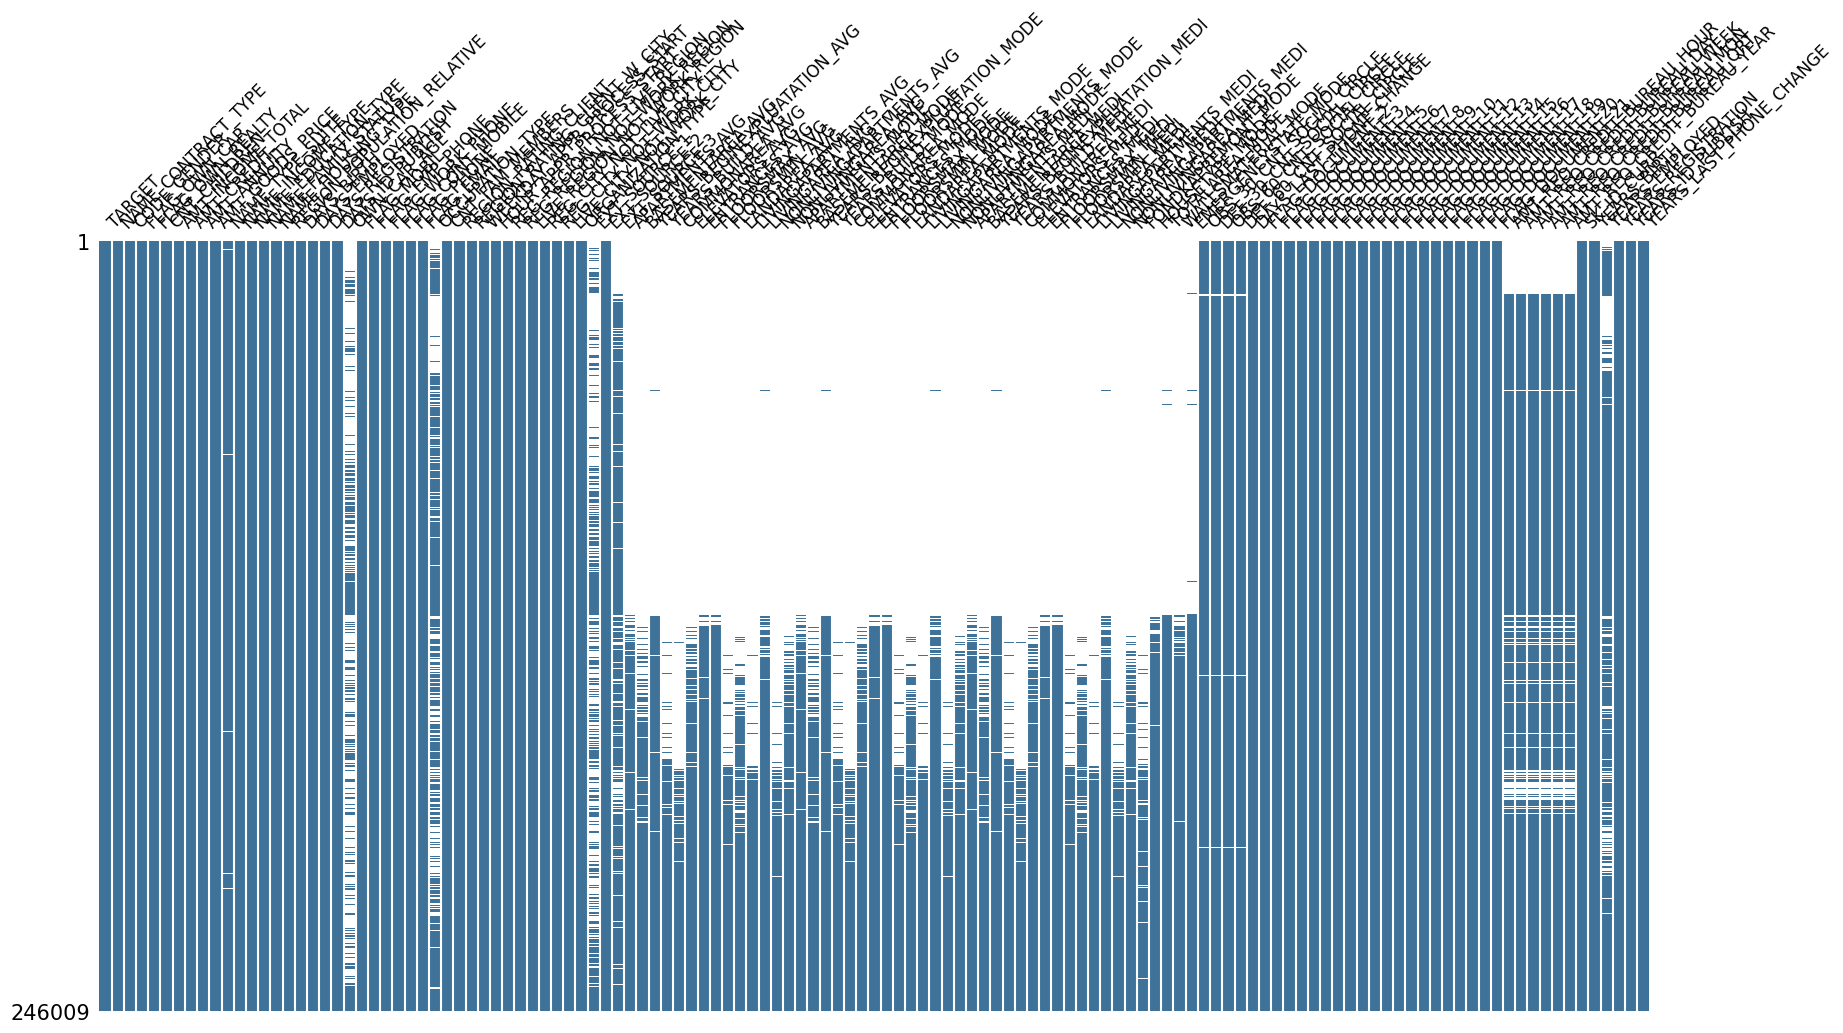

In [ ]:
msno.matrix(train, sparkline=False, figsize=(20,10), sort='ascending', fontsize=12, labels=True, color='')

In [113]:
# Check Missing valuein train
print('Missing value')
df_temp = test.isnull().sum().reset_index()
df_temp['% missing'] = df_temp.iloc[:, 1] / len(test) * 100
print(df_temp)

Missing value
                            index      0  % missing
0              NAME_CONTRACT_TYPE      0   0.000000
1                     CODE_GENDER      1   0.001626
2                    FLAG_OWN_CAR      0   0.000000
3                 FLAG_OWN_REALTY      0   0.000000
4                    CNT_CHILDREN      0   0.000000
5                AMT_INCOME_TOTAL      0   0.000000
6                      AMT_CREDIT      0   0.000000
7                     AMT_ANNUITY      2   0.003252
8                 AMT_GOODS_PRICE     54   0.087802
9                 NAME_TYPE_SUITE    246   0.399987
10               NAME_INCOME_TYPE      0   0.000000
11            NAME_EDUCATION_TYPE      0   0.000000
12             NAME_FAMILY_STATUS      0   0.000000
13              NAME_HOUSING_TYPE      0   0.000000
14     REGION_POPULATION_RELATIVE      0   0.000000
15                     DAYS_BIRTH      0   0.000000
16                  DAYS_EMPLOYED      0   0.000000
17              DAYS_REGISTRATION      0   0.00000

For missing value, I will fill these following which I think they are usefull:

- AMT_ANUITY

- AMT_GOODS_PRICE

- NAME_TYPE_SUITE

- OWN_CAR_AGE

- OCCUPATION_TYPE

- CNT_FAM_MEMBERS

(for these EXT column, i don't know what it means but it distinguished the target pretty good, so I will try fill these)

- EXT_SOURCE_1 

- EXT_SOURCE_2

- EXT_SOURCE_3

- DAYS_LAST_PHONE_CHANGE

- AMT_REQ_CREDIT_BUREAU

For others, ends with AVG, MEDI, MODE, I don't found any sign that they can distinguish the 2 group, furthermore, the number of missing values is too high so that i will drop these columns

### Prepare Fill

In [5]:
# Check Missing valuein train
print('Missing value')
df_temp = train.isnull().sum().reset_index()
df_temp['% missing'] = df_temp.iloc[:, 1] / len(train) * 100
print(df_temp[df_temp[0] > 0])


Missing value
                          index       0  % missing
2                   CODE_GENDER       3   0.001219
8                   AMT_ANNUITY      10   0.004065
9               AMT_GOODS_PRICE     224   0.091054
10              NAME_TYPE_SUITE    1046   0.425188
20                  OWN_CAR_AGE  162188  65.927669
..                          ...     ...        ...
118   AMT_REQ_CREDIT_BUREAU_MON   33211  13.499913
119   AMT_REQ_CREDIT_BUREAU_QRT   33211  13.499913
120  AMT_REQ_CREDIT_BUREAU_YEAR   33211  13.499913
123              YEARS_EMPLOYED   44324  18.017227
126     YEARS_LAST_PHONE_CHANGE       1   0.000406

[70 rows x 3 columns]


In [6]:
# Check Missing valuein train
print('Missing value')
df_temp = train.isnull().sum().reset_index()
df_temp['% missing'] = df_temp.iloc[:, 1] / len(train) * 100
print(df_temp[df_temp[0] > 0])


Missing value
                          index       0  % missing
2                   CODE_GENDER       3   0.001219
8                   AMT_ANNUITY      10   0.004065
9               AMT_GOODS_PRICE     224   0.091054
10              NAME_TYPE_SUITE    1046   0.425188
20                  OWN_CAR_AGE  162188  65.927669
..                          ...     ...        ...
118   AMT_REQ_CREDIT_BUREAU_MON   33211  13.499913
119   AMT_REQ_CREDIT_BUREAU_QRT   33211  13.499913
120  AMT_REQ_CREDIT_BUREAU_YEAR   33211  13.499913
123              YEARS_EMPLOYED   44324  18.017227
126     YEARS_LAST_PHONE_CHANGE       1   0.000406

[70 rows x 3 columns]


In [7]:
# Check Missing valuein test
print('Missing value')
df_temp = test.isnull().sum().reset_index()
df_temp['% missing'] = df_temp.iloc[:, 1] / len(test) * 100
print(df_temp[df_temp[0] > 0])


Missing value
                          index      0  % missing
1                   CODE_GENDER      1   0.001626
7                   AMT_ANNUITY      2   0.003252
8               AMT_GOODS_PRICE     54   0.087802
9               NAME_TYPE_SUITE    246   0.399987
19                  OWN_CAR_AGE  40741  66.243374
..                          ...    ...        ...
116  AMT_REQ_CREDIT_BUREAU_WEEK   8308  13.508504
117   AMT_REQ_CREDIT_BUREAU_MON   8308  13.508504
118   AMT_REQ_CREDIT_BUREAU_QRT   8308  13.508504
119  AMT_REQ_CREDIT_BUREAU_YEAR   8308  13.508504
122              YEARS_EMPLOYED  11050  17.966895

[68 rows x 3 columns]


**Fill Strategies:**

1. CODE_GENDER: mode
23. YEARS_LAST_PHONE_CHANGE: mode
15. DAYS_LAST_PHONE_CHANGE: mode
7. CNT_FAM_MEMBERS: mean
2. AMT_ANNUITY: mean of each age group
3. AMT_GOODS_PRICE: mean of each age group
8. EXT_SOURCE_1: mean of each age group
9. EXT_SOURCE_2: mean of each age group
10. EXT_SOURCE_3: mean of each age group
5. OWN_CAR_AGE: mean of each NAME_INCOME_TYPE category
11. OBS_30_CNT_SOCIAL_CIRCLE: mean of each NAME_INCOME_TYPE
13. OBS_60_CNT_SOCIAL_CIRCLE: mean of each NAME_INCOME_TYPE
14. DEF_60_CNT_SOCIAL_CIRCLE: mean of each NAME_INCOME_TYPE
12. DEF_30_CNT_SOCIAL_CIRCLE: mean of each REGION_RATING_CLIENT
16. AMT_REQ_CREDIT_BUREAU_HOUR: mean of each AMT_GOODS_PRICE bin
17. AMT_REQ_CREDIT_BUREAU_DAY: mean of each AMT_GOODS_PRICE bin
18. AMT_REQ_CREDIT_BUREAU_WEEK: mean of each AMT_GOODS_PRICE bin
19. AMT_REQ_CREDIT_BUREAU_MON: mean of each AMT_GOODS_PRICE bin
20. AMT_REQ_CREDIT_BUREAU_QRT: mean of each AMT_GOODS_PRICE bin
21. AMT_REQ_CREDIT_BUREAU_YEAR: mean of each AMT_GOODS_PRICE bin
22. YEARS_EMPLOYED - mean of AMT_INCOME_TOTAL group
4. NAME_TYPE_SUITE: 
6. OCCUPATION_TYPE

In [8]:
def prep_fill_missing(dataframe):
    # drop useless columns
    avg_col = list(dataframe.columns[dataframe.columns.str.endswith('AVG')])
    mode_col = list(dataframe.columns[dataframe.columns.str.endswith('MODE')])
    med_col = list(dataframe.columns[dataframe.columns.str.endswith('MEDI')])
    col_to_drop = avg_col + mode_col + med_col
    # return col_to_drop
    # dataframe.drop(columns=col_to_drop, inplace=True)
    return dataframe

def fill_missing(dataframe_train, dataframe_test):
    # 1
    mode_gender = dataframe_train['CODE_GENDER'].mode()
    dataframe_train['CODE_GENDER'].fillna(mode_gender, inplace=True)
    dataframe_test['CODE_GENDER'].fillna(mode_gender, inplace=True)
    # 2
    mode_year_last_phone = dataframe_train['YEARS_LAST_PHONE_CHANGE'].mode()
    dataframe_train['YEARS_LAST_PHONE_CHANGE'].fillna(mode_year_last_phone, inplace=True)
    dataframe_test['YEARS_LAST_PHONE_CHANGE'].fillna(mode_year_last_phone, inplace=True)
    # 3
    mode_day_last_phone = dataframe_train['DAYS_LAST_PHONE_CHANGE'].mode()
    dataframe_train['DAYS_LAST_PHONE_CHANGE'].fillna(mode_day_last_phone, inplace=True)
    dataframe_test['DAYS_LAST_PHONE_CHANGE'].fillna(mode_day_last_phone, inplace=True)
    # 4
    mean_fam_mem = dataframe_train['CNT_FAM_MEMBERS'].mean()
    dataframe_train['CNT_FAM_MEMBERS'].fillna(mean_fam_mem, inplace=True)
    dataframe_test['CNT_FAM_MEMBERS'].fillna(mean_fam_mem, inplace=True)

    # 5, 6, 7, 8, 9
    dataframe_train['AGE_BIN'] = pd.cut(dataframe_train['YEARS_BIRTH'], 10)
    dataframe_test['AGE_BIN'] = pd.cut(dataframe_test['YEARS_BIRTH'], 10)

    col_to_group = 'AGE_BIN'
    col_to_impute = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
    # vòng for dùng để impute cho nhiều cột
    for i, col in enumerate(col_to_impute):
        # sau khi group kiểu này, grouped chứa 2 phần tử: val_to_group (giá trị được group, ở đây là từng Age_bin) và group_data (dataframe có Age_bin = val_to_group)
        grouped = dataframe_train.groupby([col_to_group])[col]
        for val_to_group, group_data in grouped:
            if dataframe_train[col].dtypes in [int, float]:  # fill biến numeric = mean của từng group_data
                mean_value = group_data.mean()
                # phải dùng val_to_group[0] là bởi val_to_group được trả về là tuple do hàm cut ban đầu (đừng quan tâm cái này vội)
                dataframe_train.loc[(dataframe_train[col_to_group] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mean_value
                dataframe_test.loc[(dataframe_test[col_to_group] == val_to_group[0]) & (dataframe_test[col].isna()), col] = mean_value
            else:  # fill biến câte = mode của từng group_data
                mode_value = group_data.mode().iloc[0] if not group_data.mode().empty else np.nan
                dataframe_train.loc[(dataframe_train[col_to_group] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mode_value
                dataframe_test.loc[(dataframe_test[col_to_group] == val_to_group[0]) & (dataframe_test[col].isna()), col] = mode_value

    # 10, 11, 12, 13
    col_to_group = 'NAME_INCOME_TYPE'
    col_to_impute = ['OWN_CAR_AGE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
    # vòng for dùng để impute cho nhiều cột
    for i, col in enumerate(col_to_impute):
        # sau khi group kiểu này, grouped chứa 2 phần tử: val_to_group (giá trị được group, ở đây là từng Age_bin) và group_data (dataframe có Age_bin = val_to_group)
        grouped = dataframe_train.groupby([col_to_group])[col]
        for val_to_group, group_data in grouped:
            if dataframe_train[col].dtypes in [int, float]:  # fill biến numeric = mean của từng group_data
                mean_value = group_data.mean()
                # phải dùng val_to_group[0] là bởi val_to_group được trả về là tuple do hàm cut ban đầu (đừng quan tâm cái này vội)
                dataframe_train.loc[(dataframe_train[col_to_group] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mean_value
                dataframe_test.loc[(dataframe_test[col_to_group] == val_to_group[0]) & (dataframe_test[col].isna()), col] = mean_value
            else:  # fill biến câte = mode của từng group_data
                mode_value = group_data.mode().iloc[0] if not group_data.mode().empty else np.nan
                dataframe_train.loc[(dataframe_train[col_to_group] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mode_value
                dataframe_test.loc[(dataframe_test[col_to_group] == val_to_group[0]) & (dataframe_test[col].isna()), col] = mode_value

    # 14
    col_to_group = 'REGION_RATING_CLIENT'
    col_to_impute = ['DEF_30_CNT_SOCIAL_CIRCLE']
    # vòng for dùng để impute cho nhiều cột
    for i, col in enumerate(col_to_impute):
        # sau khi group kiểu này, grouped chứa 2 phần tử: val_to_group (giá trị được group, ở đây là từng Age_bin) và group_data (dataframe có Age_bin = val_to_group)
        grouped = dataframe_train.groupby([col_to_group])[col]
        for val_to_group, group_data in grouped:
            if dataframe_train[col].dtypes in [int, float]:  # fill biến numeric = mean của từng group_data
                mean_value = group_data.mean()
                # phải dùng val_to_group[0] là bởi val_to_group được trả về là tuple do hàm cut ban đầu (đừng quan tâm cái này vội)
                dataframe_train.loc[(dataframe_train[col_to_group] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mean_value
                dataframe_test.loc[(dataframe_test[col_to_group] == val_to_group[0]) & (dataframe_test[col].isna()), col] = mean_value
            else:  # fill biến câte = mode của từng group_data
                mode_value = group_data.mode().iloc[0] if not group_data.mode().empty else np.nan
                dataframe_train.loc[(dataframe_train[col_to_group] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mode_value
                dataframe_test.loc[(dataframe_test[col_to_group] == val_to_group[0]) & (dataframe_test[col].isna()), col] = mode_value

    # 15, 16, 17, 18, 19, 20
    col_to_group = 'AMT_GOODS_PRICE'
    col_to_impute = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
    # vòng for dùng để impute cho nhiều cột
    for i, col in enumerate(col_to_impute):
        # sau khi group kiểu này, grouped chứa 2 phần tử: val_to_group (giá trị được group, ở đây là từng Age_bin) và group_data (dataframe có Age_bin = val_to_group)
        dataframe_train[f'{col_to_group}_BIN'] = pd.cut(dataframe_train[col_to_group], 10)
        grouped = dataframe_train.groupby([f'{col_to_group}_BIN'])[col]
        for val_to_group, group_data in grouped:
            if dataframe_train[col].dtypes in [int, float]:  # fill biến numeric = mean của từng group_data
                mean_value = group_data.mean()
                # phải dùng val_to_group[0] là bởi val_to_group được trả về là tuple do hàm cut ban đầu (đừng quan tâm cái này vội)
                dataframe_train.loc[(dataframe_train[f'{col_to_group}_BIN'] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mean_value
                dataframe_test.loc[(dataframe_test[col_to_group].between(val_to_group[0].left, val_to_group[0].right, inclusive='right')) & (dataframe_test[col].isna()), col] = mean_value
            else:  # fill biến câte = mode của từng group_data
                mode_value = group_data.mode().iloc[0] if not group_data.mode().empty else np.nan
                dataframe_train.loc[(dataframe_train[f'{col_to_group}_BIN'] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mode_value
                dataframe_test.loc[(dataframe_test[col_to_group].between(val_to_group[0].left, val_to_group[0].right, inclusive='right')) & (dataframe_test[col].isna()), col] = mode_value
    dataframe_train.drop(columns=f'{col_to_group}_BIN', inplace=True)

    # 21
    col_to_group = 'AMT_INCOME_TOTAL'
    col_to_impute = ['YEARS_EMPLOYED']
    # vòng for dùng để impute cho nhiều cột
    for i, col in enumerate(col_to_impute):
        # sau khi group kiểu này, grouped chứa 2 phần tử: val_to_group (giá trị được group, ở đây là từng Age_bin) và group_data (dataframe có Age_bin = val_to_group)
        dataframe_train[f'{col_to_group}_BIN'] = pd.cut(dataframe_train[col_to_group], 10)
        grouped = dataframe_train.groupby([f'{col_to_group}_BIN'])[col]
        for val_to_group, group_data in grouped:
            if dataframe_train[col].dtypes in [int, float]:  # fill biến numeric = mean của từng group_data
                mean_value = group_data.mean()
                # phải dùng val_to_group[0] là bởi val_to_group được trả về là tuple do hàm cut ban đầu (đừng quan tâm cái này vội)
                dataframe_train.loc[(dataframe_train[f'{col_to_group}_BIN'] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mean_value
                dataframe_test.loc[(dataframe_test[col_to_group].between(val_to_group[0].left, val_to_group[0].right, inclusive='right')) & (dataframe_test[col].isna()), col] = mean_value
            else:  # fill biến câte = mode của từng group_data
                mode_value = group_data.mode().iloc[0] if not group_data.mode().empty else np.nan
                dataframe_train.loc[(dataframe_train[f'{col_to_group}_BIN'] == val_to_group[0]) & (dataframe_train[col].isna()), col] = mode_value
                dataframe_test.loc[(dataframe_test[col_to_group].between(val_to_group[0].left, val_to_group[0].right, inclusive='right')) & (dataframe_test[col].isna()), col] = mode_value
    dataframe_train.drop(columns=f'{col_to_group}_BIN', inplace=True)

    dataframe_train.drop(columns='AGE_BIN', inplace=True)
    dataframe_test.drop(columns='AGE_BIN', inplace=True)
    return dataframe_train, dataframe_test

In [9]:
print(train.shape)
print(test.shape)

(246009, 127)
(61502, 126)


In [20]:
df_temp = train[['YEARS_BIRTH', 'AMT_ANNUITY']].copy(deep=True)
bins = list(range(18, 70, 5))
labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]  # Labels like "18-22"

# Create AGE_BIN column
df_temp['AGE_BIN'] = pd.cut(df_temp['YEARS_BIRTH'], bins=bins, labels=labels, right=False)

# Preview the result
print(df_temp[['YEARS_BIRTH', 'AGE_BIN']].head())
grouped = df_temp.groupby('AGE_BIN')[['AMT_ANNUITY']].mean()

   YEARS_BIRTH AGE_BIN
0         46.0   43-47
1         53.0   53-57
2         55.0   53-57
3         47.0   43-47
4         52.0   48-52


C:\Users\trong\AppData\Local\Temp\ipykernel_34620\3391667451.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('AGE_BIN')[['AMT_ANNUITY']].mean()


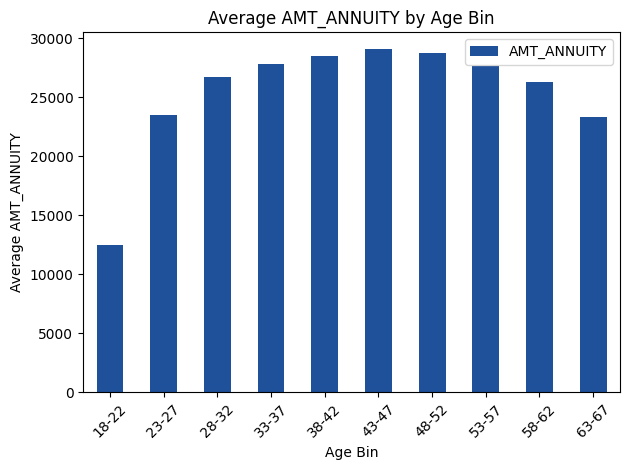

In [21]:
grouped.plot(kind='bar', color=BLUE)
plt.title('Average AMT_ANNUITY by Age Bin')
plt.ylabel('Average AMT_ANNUITY')
plt.xlabel('Age Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\trong\AppData\Local\Temp\ipykernel_34620\2647004267.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df_temp, x='YEARS_BIRTH', palette='viridis', fill=True, common_norm=False, alpha=0.6)


<Axes: xlabel='YEARS_BIRTH', ylabel='Density'>

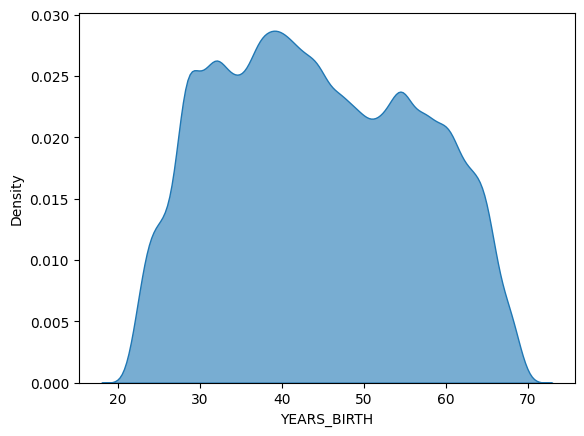

In [24]:
sns.kdeplot(data=df_temp, x='YEARS_BIRTH', palette='viridis', fill=True, common_norm=False, alpha=0.6)


## Outliers

In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
# add noise to y axis to avoid overlapping
def rand_jitter(arr):
    nosie = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr))

def draw_feature_distribution(df, column):
    column_values = df[df[column].notna()][column]
    # group by target
    class_0_values = df[df[column].notna() & (df['TARGET']==0)][column]
    class_1_values = df[df[column].notna() & (df['TARGET']==1)][column]
    class_t_values = df[df[column].notna() & (df['TARGET'].isna())][column]        
    print('\n\n', column)
    # for features with unique values >= 10
    if len(df[column].value_counts().keys()) >= 10:
        fig, ax = plt.subplots(1, figsize=(15, 4))
        if df[column].dtype == 'object':
            label_encoder = LabelEncoder()
            label_encoder.fit(column_values)
            class_0_values = label_encoder.transform(class_0_values)
            class_1_values = label_encoder.transform(class_1_values)
            class_t_values = label_encoder.transform(class_t_values)
            column_values = label_encoder.transform(column_values)
            plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, fontsize=12, rotation='vertical')

        ax.scatter(class_0_values, rand_jitter([0]*class_0_values.shape[0]), label='Class0', s=10, marker='o', color='#7ac143', alpha=1)
        ax.scatter(class_1_values, rand_jitter([10]*class_1_values.shape[0]), label='Class1', s=10, marker='o', color='#fd5c63', alpha=1)
        ax.scatter(class_t_values, rand_jitter([20]*class_t_values.shape[0]), label='Test', s=10, marker='o', color='#037ef3', alpha=0.4)
        ax.set_title(column +' group by target', fontsize=16)
        ax.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
        ax.set_title(column +' distribution', fontsize=16)
    else:      
        all_categories = list(df[df[column].notna()][column].value_counts().keys())
        bar_width = 0.25
        
        fig, ax = plt.subplots(figsize=(20, 4))
        ax.set_title(column, fontsize=16)
        plt.xlabel('Categories', fontsize=16)
        plt.ylabel('Counts', fontsize=16)

        value_counts = class_0_values.value_counts()
        x_0 = np.arange(len(all_categories))
        y_0 = [value_counts.get(categroy, 0) for categroy in all_categories]
        ax.bar(x_0, y_0, color='#7ac143', width=bar_width, label='class0')

        value_counts = class_1_values.value_counts()
        x_1 = np.arange(len(all_categories))
        y_1 = [value_counts.get(categroy, 0) for categroy in all_categories]
        ax.bar(x_1+bar_width, y_1, color='#fd5c63', width=bar_width, label='class1')
        
        value_counts = class_t_values.value_counts()
        x_2 = np.arange(len(all_categories))
        y_2 = [value_counts.get(categroy, 0) for categroy in all_categories]
        ax.bar(x_2+2*bar_width, y_2, color='#037ef3', width=bar_width, label='test')
        
        ax.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
        
        for i, v in enumerate(y_0):
            if y_0[i]+y_1[i] == 0:
                ax.text(i - .08, max(y_0)//1.25,  'Missing in Train', fontsize=14, rotation='vertical')
            else:
                ax.text(i - .08, max(y_0)//1.25,  "{:0.1f}%".format(100*y_0[i]/(y_0[i]+y_1[i])), fontsize=14, rotation='vertical')
        
        for i, v in enumerate(y_1):
            if y_0[i]+y_1[i] == 0:
                ax.text(i - .08, max(y_0)//1.25,  'Missing in Train', fontsize=14, rotation='vertical')
            else:
                ax.text(i + bar_width - .08, max(y_0)//1.25, "{:0.1f}%".format(100*y_1[i]/(y_0[i]+y_1[i])), fontsize=14, rotation='vertical')
 
        for i, v in enumerate(y_2):
            if y_2[i] == 0:
                ax.text(i + 2*bar_width - .08, max(y_0)//1.25, 'Missing in Test', fontsize=14, rotation='vertical')
            else:
                ax.text(i + 2*bar_width - .08, max(y_0)//1.25, str(y_2[i]), fontsize=14, rotation='vertical')
        
        plt.xticks(x_0 + 2*bar_width/3, all_categories, fontsize=16)
        
    plt.show()

only showing the distribution for the first few columns, edit the counter to show all distribution


 NAME_CONTRACT_TYPE


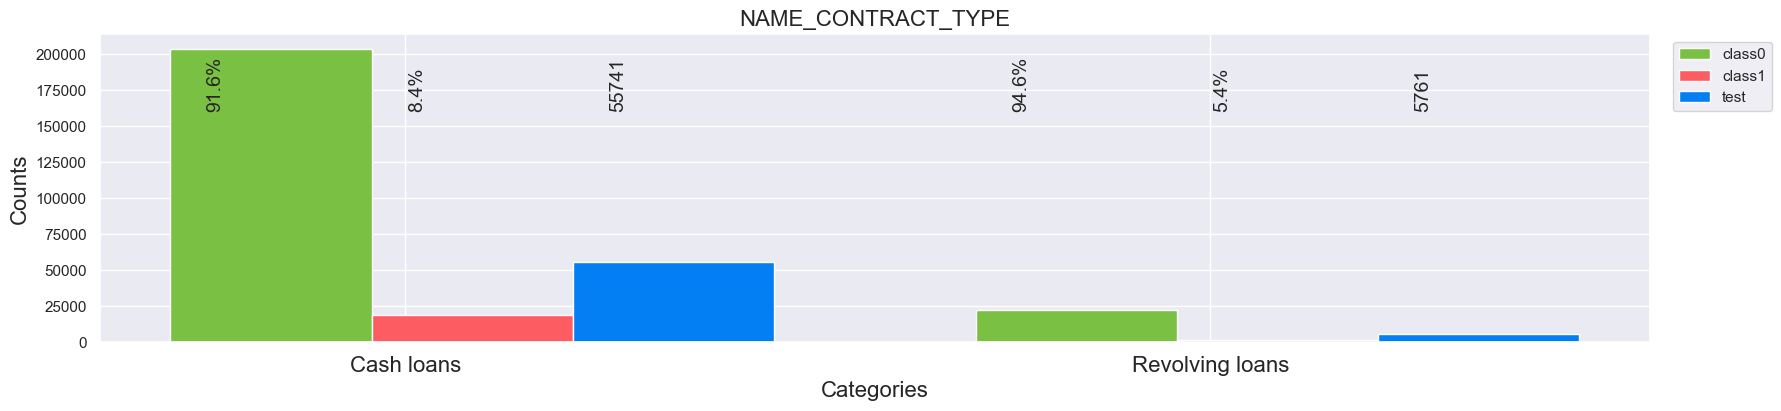



 CODE_GENDER


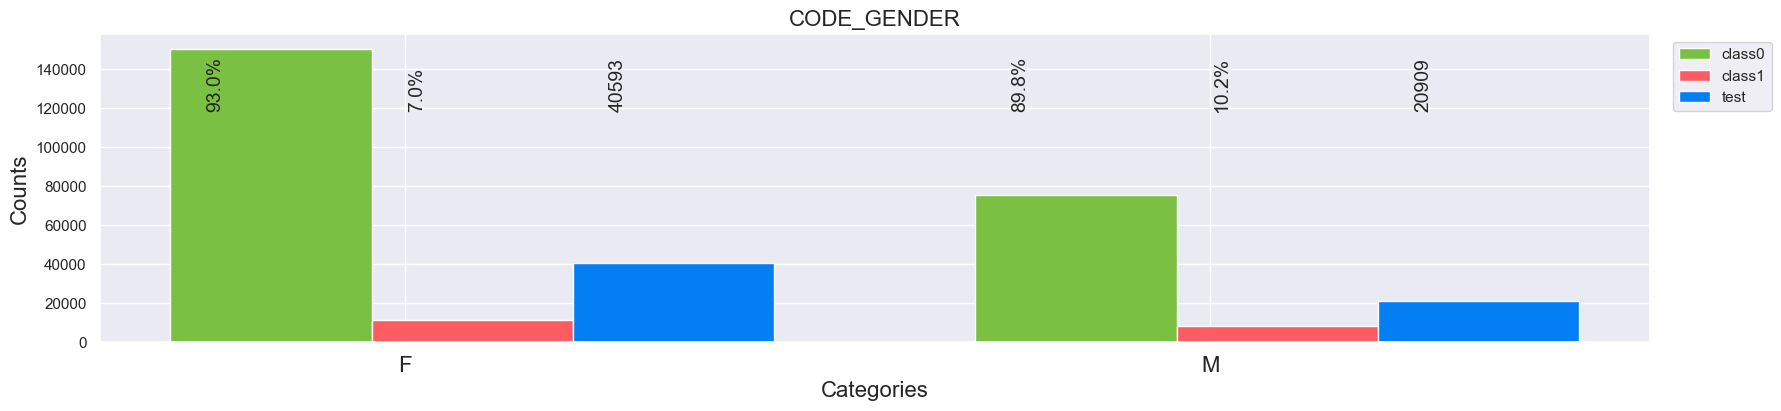



 FLAG_OWN_CAR


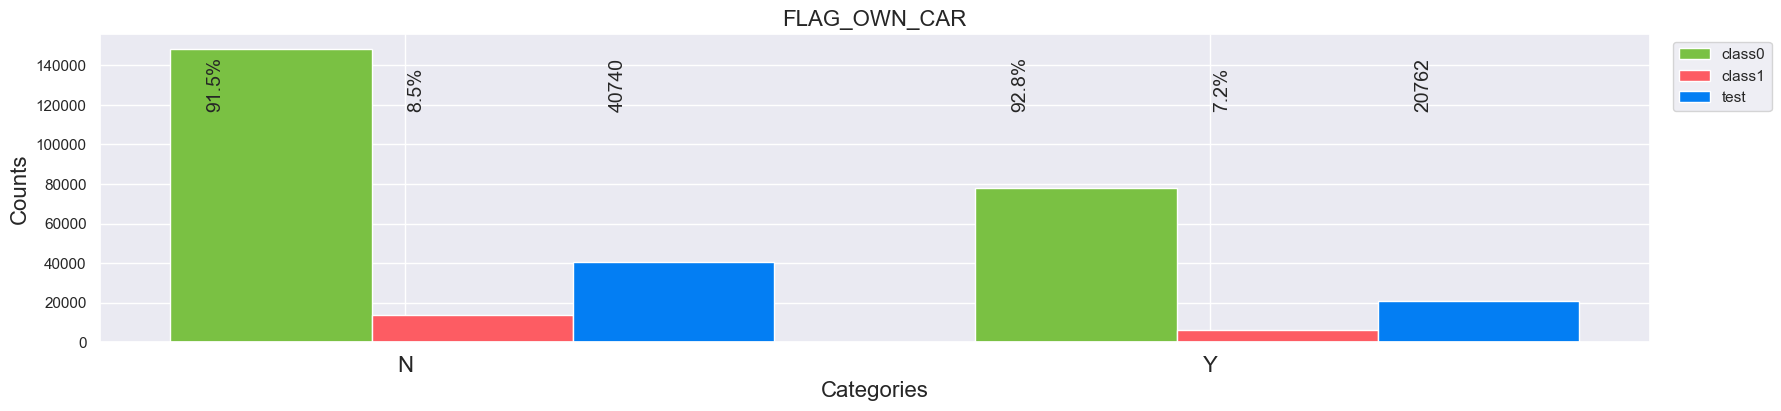



 FLAG_OWN_REALTY


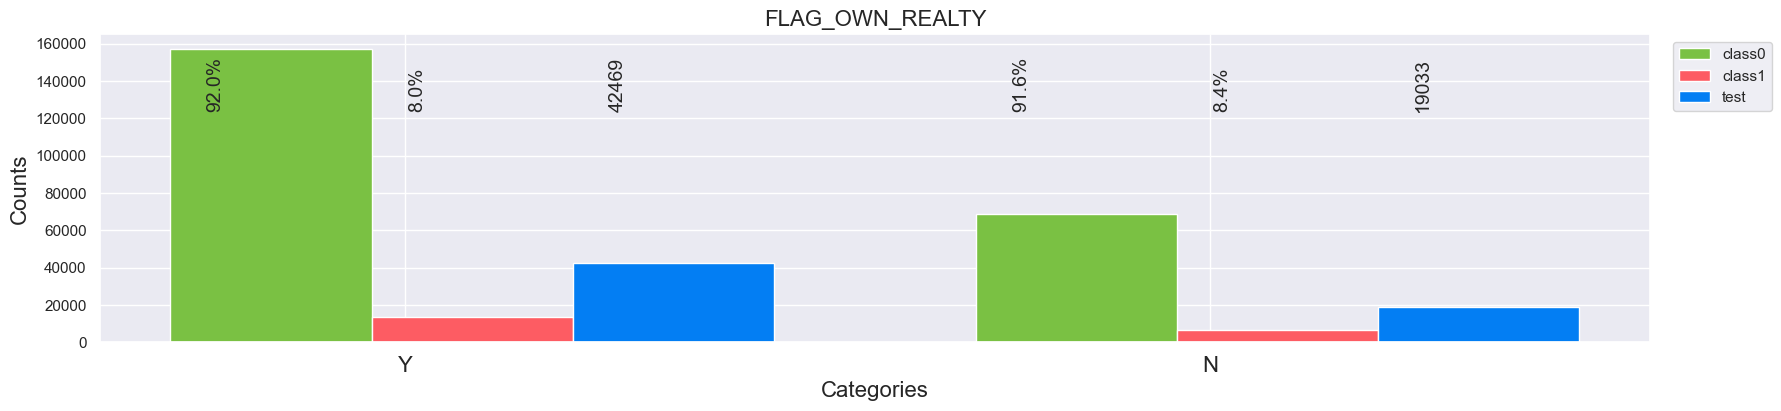



 NAME_TYPE_SUITE


Exception ignored in: <function tqdm.__del__ at 0x000002CB86901940>
Traceback (most recent call last):
  File "c:\Users\trong\anaconda3\envs\test2\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\trong\anaconda3\envs\test2\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


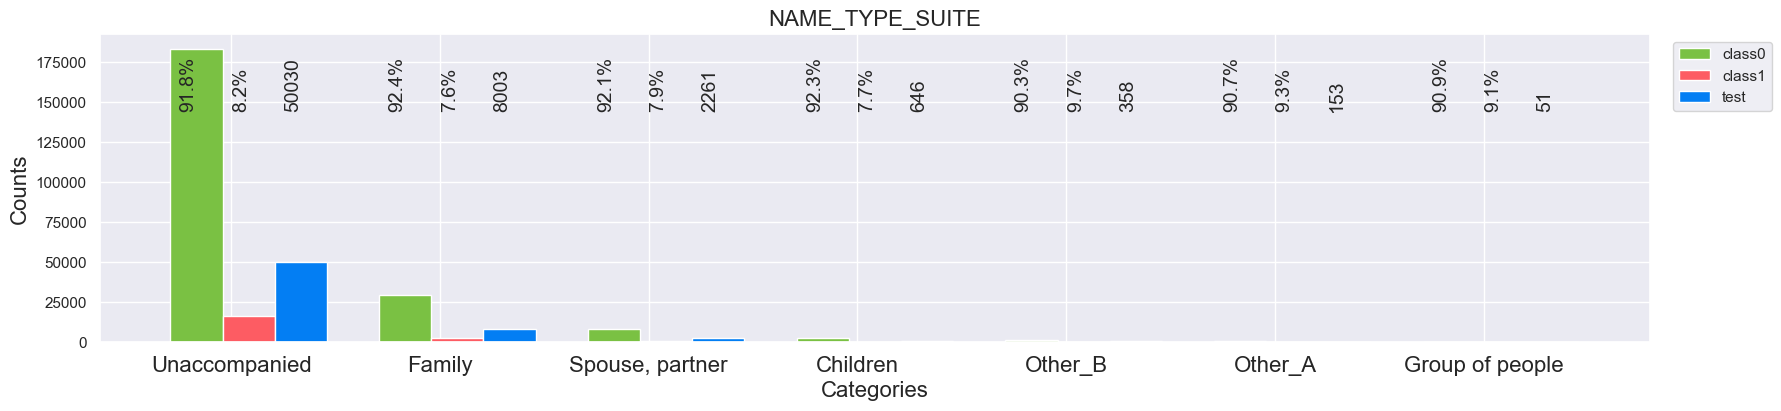



 NAME_INCOME_TYPE


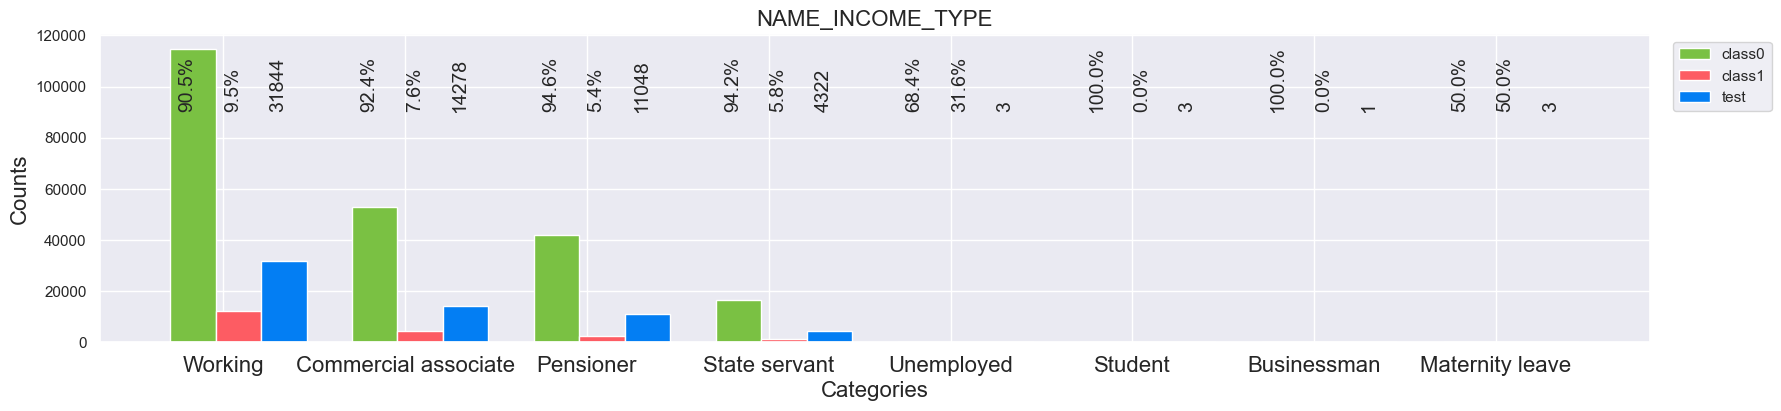



 NAME_EDUCATION_TYPE


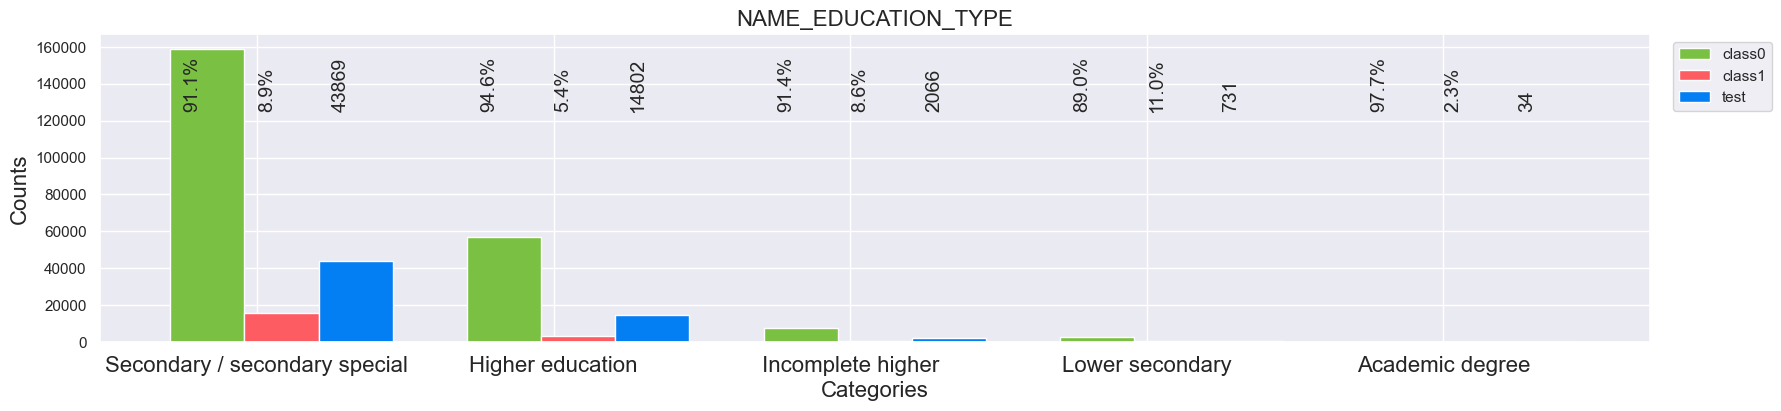



 NAME_FAMILY_STATUS


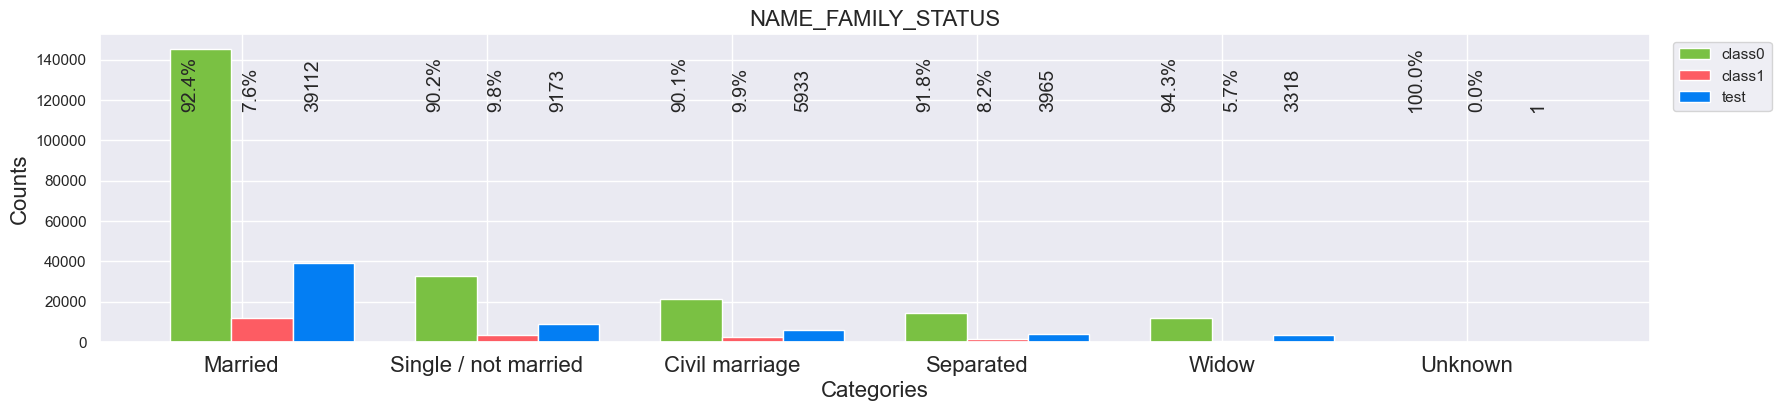



 NAME_HOUSING_TYPE


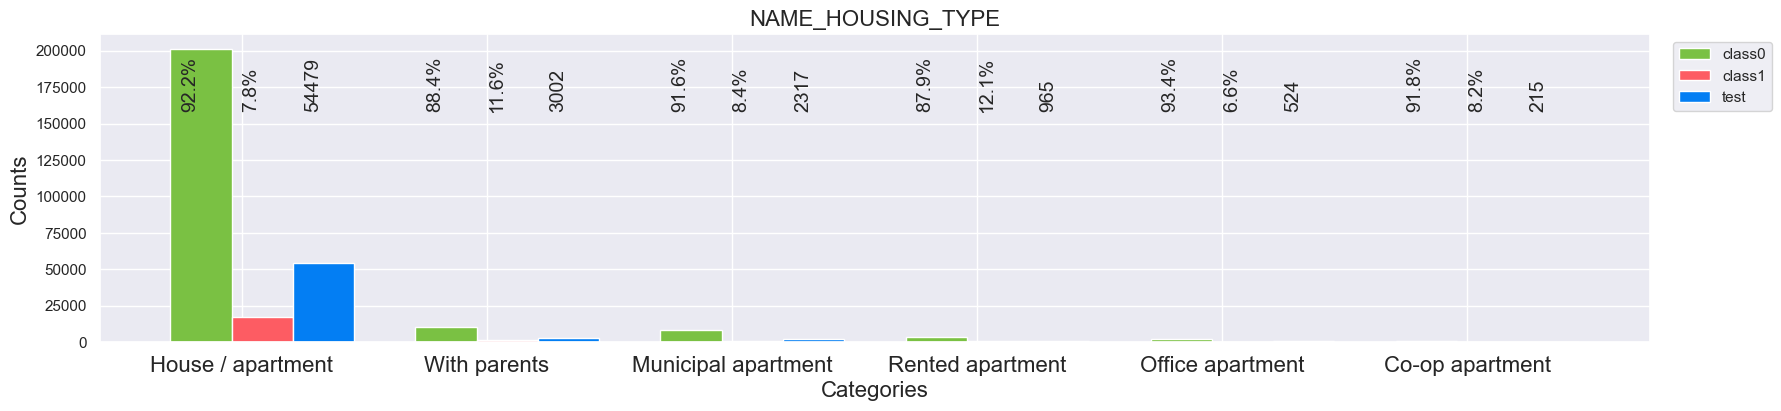



 OCCUPATION_TYPE


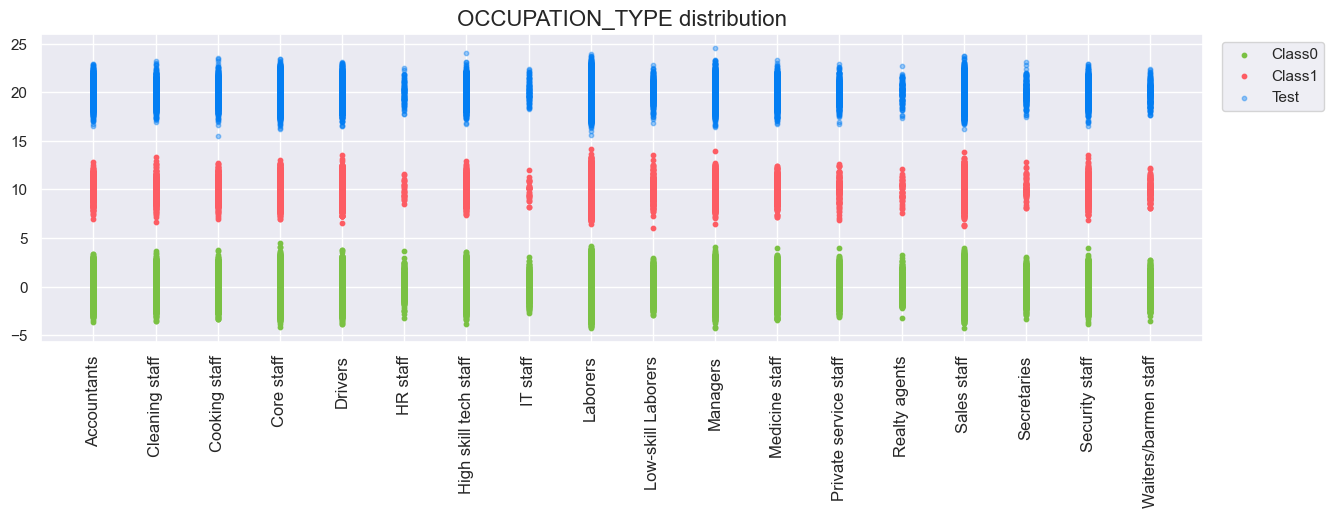

In [257]:
print("only showing the distribution for the first few columns, edit the counter to show all distribution")
show_feature_count = 10
all_application_df = pd.concat([train, test])
for column in all_application_df.select_dtypes('object').columns:
    if show_feature_count == 0:
        break
    show_feature_count -= 1
    draw_feature_distribution(all_application_df, column)

### Check outliers in categorical variable (density < 1%)

In [380]:
all_application_df = pd.concat([train, test])


In [309]:
columns = all_application_df.select_dtypes('object').columns
for col in columns:
    print(all_application_df[col].value_counts(normalize=True))
    

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64
CODE_GENDER
F    0.658357
M    0.341643
Name: proportion, dtype: float64
FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64
FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64
NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64
NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64
NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incom

Group value (density < 1%) to "Others" group

In [381]:
columns = all_application_df.select_dtypes('object').columns
for col in columns:
    if all_application_df[col].nunique() > 2:
        cond = all_application_df[col].value_counts(normalize=True)[all_application_df[col].value_counts(normalize=True) < 0.015].index.to_list()
        all_application_df.loc[all_application_df[col].isin(cond), col] = 'Others'

In [382]:
columns = all_application_df.select_dtypes('object').columns
for col in columns:
    print(all_application_df[col].value_counts(normalize=True))

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64
CODE_GENDER
F    0.658357
M    0.341643
Name: proportion, dtype: float64
FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64
FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64
NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Others             0.020077
Name: proportion, dtype: float64
NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Others                  0.000179
Name: proportion, dtype: float64
NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Others                           0.012943
Name: proportion, dtype: float64
NAME_FAMILY_STATUS
Married                 0.638780
Single / not marrie

### Check outlier for numeric columns

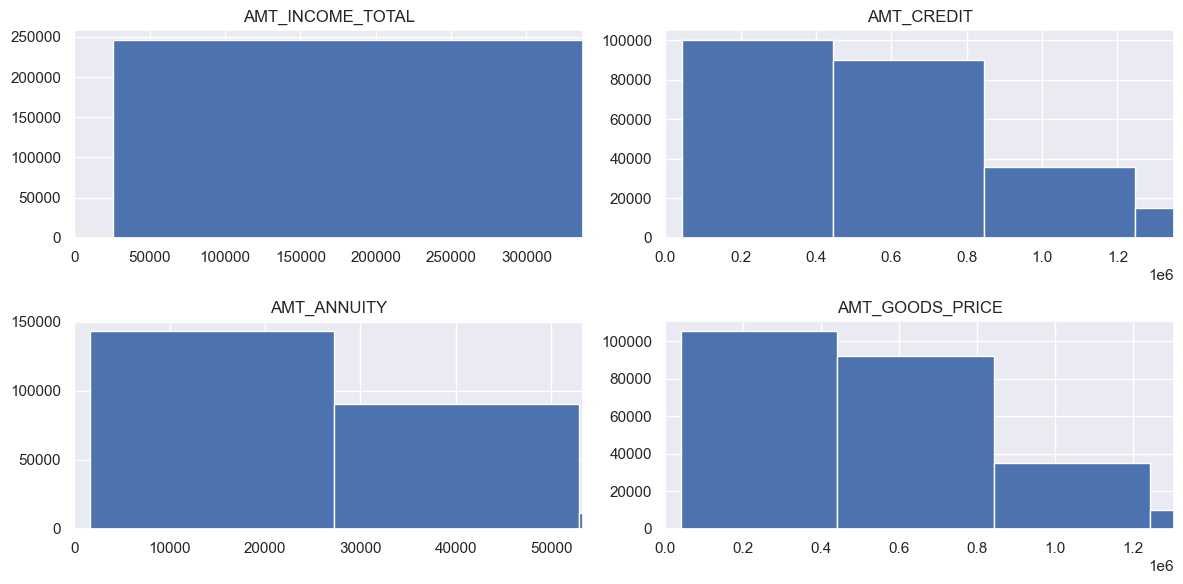

In [ ]:
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df_temp = train.copy(deep=True)
fig, axes = plt.subplots(2,2, figsize=(12, 6))
axes = axes.flatten()
for i, col in enumerate(columns):
    axes[i].hist(df_temp[col])
    axes[i].set_title(col)
    axes[i].set_xlim(0, df_temp[col].quantile(.96))
plt.tight_layout()

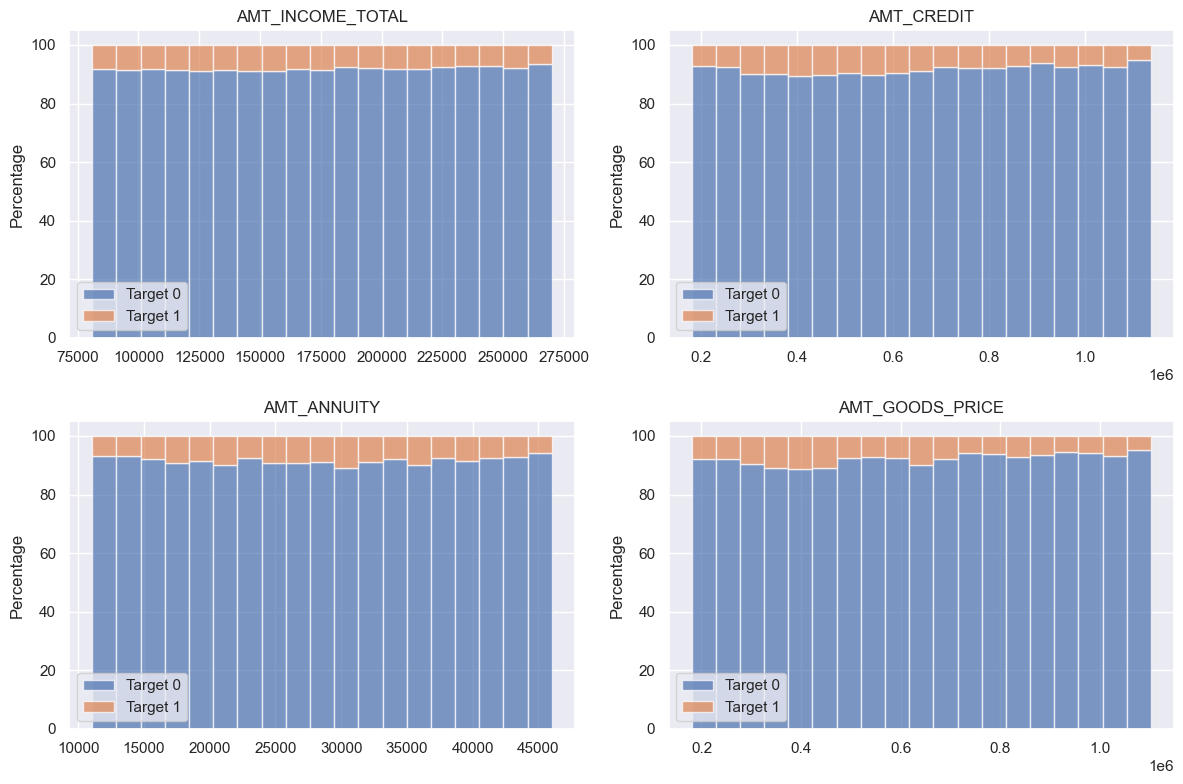

In [307]:
import numpy as np

columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df_temp = train.copy(deep=True)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
    upper_limit = df_temp[col].quantile(0.9)
    lower_limit = df_temp[col].quantile(0.1)
    df_temp.loc[df_temp[col] >= upper_limit, col] = upper_limit
    df_temp.loc[df_temp[col] <= lower_limit, col] = lower_limit

    # Prepare data for stacking
    bins = np.linspace(df_temp[col].min(), df_temp[col].max(), 20)
    hist_target_0, _ = np.histogram(df_temp[df_temp['TARGET'] == 0][col], bins=bins)
    hist_target_1, _ = np.histogram(df_temp[df_temp['TARGET'] == 1][col], bins=bins)

    # Normalize to percentages
    total = hist_target_0 + hist_target_1
    hist_target_0 = hist_target_0 / total * 100
    hist_target_1 = hist_target_1 / total * 100

    # Plot stacked bar chart
    axes[i].bar(bins[:-1], hist_target_0, width=np.diff(bins), align="edge", label="Target 0", alpha=0.7)
    axes[i].bar(bins[:-1], hist_target_1, width=np.diff(bins), align="edge", bottom=hist_target_0, label="Target 1", alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_ylabel("Percentage")
    axes[i].legend()

plt.tight_layout()
plt.show()


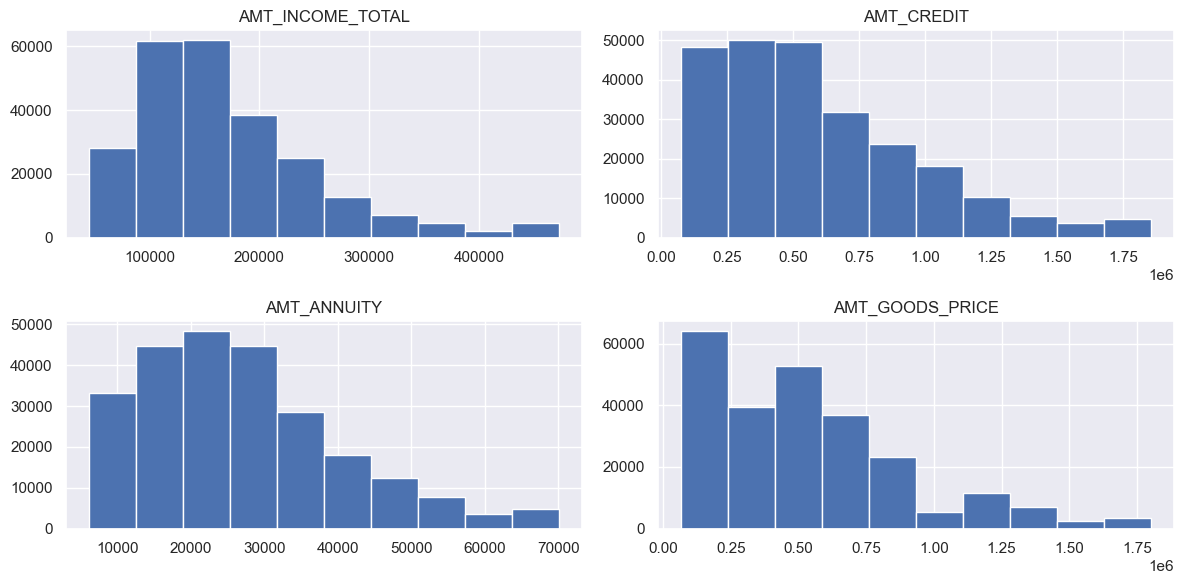

In [304]:
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df_temp = train.copy(deep=True)
fig, axes = plt.subplots(2,2, figsize=(12, 6))
axes = axes.flatten()
for i, col in enumerate(columns):
    upper_limit = df_temp[col].quantile(.99)
    lower_limit = df_temp[col].quantile(.01)
    df_temp.loc[df_temp[col] >= upper_limit, col] = upper_limit
    df_temp.loc[df_temp[col] <= lower_limit, col] = lower_limit
    axes[i].hist(df_temp[col])
    axes[i].set_title(col)
plt.tight_layout()

1350000.0

## WOE


In [ ]:
import pkg_resources
import pip
# installedPackages = {pkg.key for pkg in pkg_resources.working_set}
# required = { 'pandas','numpy', 'matplotlib', 'seaborn','toad','pickle','sklearn'}
# missing = required - installedPackages
# if missing:
#     !pip install pandas
#     !pip install numpy
#     !pip install matplotlib
#     !pip install seaborn
#     !pip install toad
#     !pip install pickle
#     !pip install sklearn

import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np
import glob
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import toad
import pickle

In [17]:
train.shape

(246009, 80)

In [ ]:
test.shape


(61502, 79)

### IV and CORR

In [62]:
train_selected, drop_lst= toad.selection.select(frame = train,
                                                target=train['TARGET'], 
                                                empty = 0.6, 
                                                iv = 0.02, corr = .9, 
                                                return_drop=True, 
                                                exclude=['SK_ID_CURR', 'TARGET'])
# frame: dataset
# target: target column
# empty: remove feature with > 60% empty
# iv: retain feature with iv > 0.02
# corr: retain feature with corr < 0.9
# return_drop = True: return the column dropped
# exclude: a list of column that should not be assess and drop (id, label)
print("keep:",train_selected.shape[1],
      "\ndrop iv:",len(drop_lst['iv']),
      "\ndrop empty:",len(drop_lst['empty']),
      "\ndrop corr:",len(drop_lst['corr']))

keep: 31 
drop iv: 42 
drop empty: 0 
drop corr: 7


In [63]:
train_selected

TARGET CODE_GENDER  AMT_ANNUITY  AMT_GOODS_PRICE  \
0            0           F      35698.5        1129500.0   
1            0           F      29686.5         297000.0   
2            0           M      21865.5         513000.0   
3            0           M      27517.5         454500.0   
4            0           M      42075.0        1530000.0   
...        ...         ...          ...              ...   
246004       0           M      27558.0         225000.0   
246005       0           F      12001.5         225000.0   
246006       0           F      29979.0         585000.0   
246007       1           F      20205.0         319500.0   
246008       0           F      49117.5         675000.0   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              State servant               Higher education   
1                    Working  Secondary / secondary special   
2                    Working  Secondary / secondary special   
3              State servant  Secondary / secondary special   
4              State servant               Higher education   
...                      ...                            ...   
246004               Working  Secondary / secondary special   
246005             Pensioner  Secondary / secondary special   
246006               Working               Higher education   
246007  Commercial associate  Secondary / secondary special   
246008  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                    Married                    0.003541      -16765   
1             Civil marriage                    0.008019      -19005   
2       Single / not married                    0.028663      -19932   
3                    Married                    0.035792      -16941   
4                    Married                    0.003122      -18850   
...                      ...                         ...         ...   
246004             Separated                    0.032561       -9327   
246005                 Widow                    0.025164      -20775   
246006             Separated                    0.005002      -14966   
246007               Married                    0.005313      -11961   
246008               Married                    0.046220      -16856   

        DAYS_EMPLOYED  ...  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0               -1188  ...                  -828.0                1   
1               -3039  ...                  -617.0                1   
2               -3038  ...                 -1106.0                0   
3               -1588  ...                 -2536.0                1   
4                -449  ...                 -1070.0                1   
...               ...  ...                     ...              ...   
246004           -236  ...                  -273.0                0   
246005         365243  ...                     0.0                1   
246006          -7921  ...                 -1909.0                1   
246007          -4786  ...                  -322.0                1   
246008          -1262  ...                  -787.0                1   

        AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.000000                  0.000000   
1                         0.006311                  0.006598   
2                         0.000000                  0.000000   
3                         0.000000                  0.000000   
4                         0.000000                  0.000000   
...                            ...                       ...   
246004                    0.007689                  0.007689   
246005                    0.006113                  0.006455   
246006                    1.000000                  0.000000   
246007                    0.000000                  0.000000   
246008                    0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ

### Binning

In [30]:
import time
start = time.time()
combiner = toad.transform.Combiner()
# use the filtered features for training
# Use the stable chi-square binning, 
# specifying that each bin has at least 5% data to ensure stability
# empty values ​​will be automatically assigned to the best bin
combiner.fit(X=train_selected,
             y=train_selected['TARGET'],
             method='chi',
             min_samples = 0.05,
             exclude=['SK_ID_CURR', 'TARGET'],
             empty_separate = True,
             n_bins = None)
end = time.time()
print((end-start)/60)

#output binning
bins = combiner.export()

8.643927693367004


<Axes: xlabel='AMT_ANNUITY', ylabel='prop'>

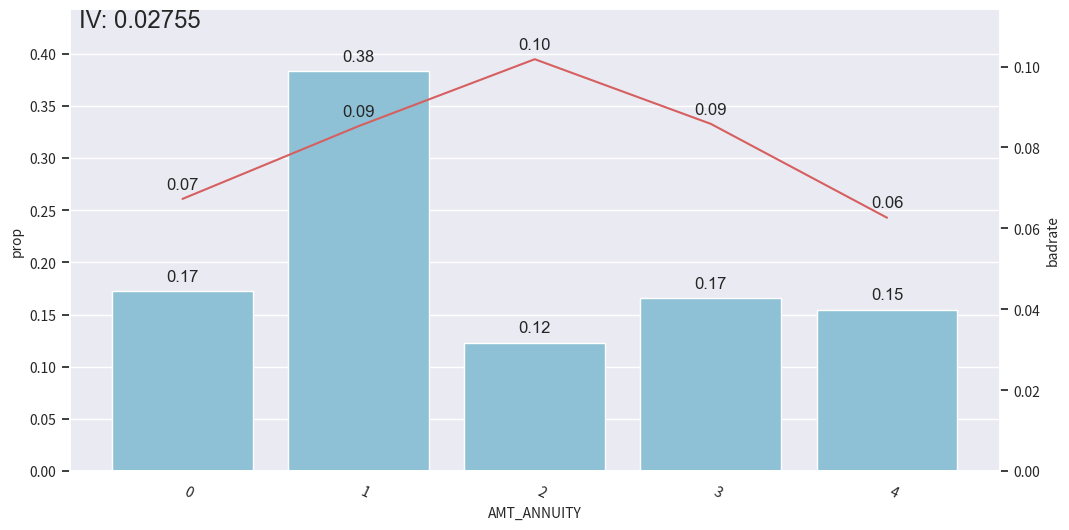

In [43]:
#apply binning
train_selected_bin = combiner.transform(train_selected)
test_bin = combiner.transform(test[train_selected_bin.columns.drop('TARGET')])

#Fine tune bins
from toad.plot import  bin_plot,badrate_plot
bin_plot(train_selected_bin,x='AMT_ANNUITY',target='TARGET')
# bin_plot(test_bin,x='AMT_ANNUITY',target='TARGET')

### WOE

In [44]:
##transform to WOE
t=toad.transform.WOETransformer()
#transform training set
train_woe = t.fit_transform(X=train_selected_bin,
                            y=train_selected_bin['TARGET'], 
                            exclude=['SK_ID_CURR', 'TARGET'])
#transform testing set
test_woe = t.transform(test_bin)

final_data_woe = pd.concat([train_woe,test_woe])

### PSI

In [52]:
exclude_list = ['SK_ID_CURR', 'TARGET']
#get the feature name
features_list = [feat for feat in train_woe.columns if feat not in exclude_list]
#calculate PSI using toad
psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values()
#put into a dataframe
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns = {'index' : 'feature',0:'psi'})
# psi_df
# features less than 0.25
psi005 = list(psi_df[psi_df.psi<0.25].feature)
# features geater than 0.25
psi_remove = list(psi_df[psi_df.psi>=0.25].feature)

# keep exclude list
for i in exclude_list:
    if i in psi005:
        pass
    else:
       psi005.append(i) 
# remove features that are geater than 0.25
train_selected_woe_psi = train_woe[psi005]
test_woe['TARGET'] = np.nan
off_woe_psi = test_woe[psi005]

# output our final data table
final_data_woe = pd.concat([train_selected_woe_psi,off_woe_psi])

In [54]:
features_use = [feat for feat in final_data_woe.columns if feat not in exclude_list]
features_use

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_1',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'REG_CITY_NOT_LIVE_CITY',
 'NAME_INCOME_TYPE',
 'REG_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'CODE_GENDER',
 'YEARS_EMPLOYED',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_POPULATION_RELATIVE',
 'ORGANIZATION_TYPE',
 'DAYS_REGISTRATION',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'NAME_FAMILY_STATUS',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'OWN_CAR_AGE',
 'AMT_GOODS_PRICE']

In [61]:
def check_train_test_auc(x_train,y_train,x_test,y_test):
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=42,C= 0.001, penalty='l2', solver='newton-cg', class_weight='balanced')
    lr.fit(x_train, y_train)

    pred_train = lr.predict_proba(x_train)[:,1]
    from toad.metrics import KS, AUC

    print('train KS',KS(pred_train, y_train))
    print('train AUC',AUC(pred_train, y_train))
    
    pred_OOT =lr.predict_proba(x_test)[:,1]
    print('Test KS',KS(pred_OOT, y_test))
    print('Test AUC',AUC(pred_OOT, y_test))
    
    from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report

    fig, ax = plt.subplots(figsize=(12, 8))
    plot_roc_curve(lr, x_test, y_test, color='blue', ax=ax)
    return lr
#train & test
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_woe[features_use], train_woe['TARGET'], random_state=42)
model = check_train_test_auc(X_train, y_train, X_val, y_val)

train KS 0.357990733861891
train AUC 0.7381248547996202
Test KS 0.3703936931036621
Test AUC 0.7453714550398757


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\trong\anaconda3\envs\test2\Lib\site-packages\sklearn\metrics\__init__.py)

### Others

In [120]:
from sklearn.feature_selection import mutual_info_classif

In [195]:
from tqdm import tqdm_notebook as tqdm


In [373]:
def create_feature(dataframe): # approved
    dataframe['30_def'] = np.where(dataframe['DEF_30_CNT_SOCIAL_CIRCLE'] == 0, 0, 1)
    dataframe['60_def'] = np.where(dataframe['DEF_60_CNT_SOCIAL_CIRCLE'] == 0, 0, 1)
    dataframe['30_OBS'] = np.where(dataframe['OBS_30_CNT_SOCIAL_CIRCLE'] == 0, 0, 1)
    dataframe['60_OBS'] = np.where(dataframe['OBS_60_CNT_SOCIAL_CIRCLE'] == 0, 0, 1)

def create_feature2(dataframe):
    # dataframe['annuity_income_percentage'] = dataframe['AMT_ANNUITY'] / dataframe['AMT_INCOME_TOTAL']
    # dataframe['car_to_birth_ratio'] = dataframe['OWN_CAR_AGE'] / dataframe['DAYS_BIRTH']
    # dataframe['car_to_employ_ratio'] = dataframe['OWN_CAR_AGE'] / dataframe['DAYS_EMPLOYED']
    # dataframe['children_ratio'] = dataframe['CNT_CHILDREN'] / dataframe['CNT_FAM_MEMBERS']
    dataframe['credit_to_annuity_ratio'] = dataframe['AMT_CREDIT'] / dataframe['AMT_ANNUITY']
    # dataframe['credit_to_goods_ratio'] = dataframe['AMT_CREDIT'] / dataframe['AMT_GOODS_PRICE']
    # dataframe['credit_to_income_ratio'] = dataframe['AMT_CREDIT'] / dataframe['AMT_INCOME_TOTAL']
    # dataframe['days_employed_percentage'] = dataframe['DAYS_EMPLOYED'] / dataframe['DAYS_BIRTH']
    # dataframe['income_credit_percentage'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['AMT_CREDIT']
    # dataframe['income_per_child'] = dataframe['AMT_INCOME_TOTAL'] / (1 + dataframe['CNT_CHILDREN'])
    # dataframe['income_per_person'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['CNT_FAM_MEMBERS']
    dataframe['payment_rate'] = dataframe['AMT_ANNUITY'] / dataframe['AMT_CREDIT']
    # dataframe['phone_to_birth_ratio'] = dataframe['DAYS_LAST_PHONE_CHANGE'] / dataframe['DAYS_BIRTH']
    # dataframe['phone_to_employ_ratio'] = dataframe['DAYS_LAST_PHONE_CHANGE'] / dataframe['DAYS_EMPLOYED']
    return dataframe

def create_feature3(dataframe):
    # "domain knowledge"
    dataframe['creadit_income_pct'] = dataframe['AMT_CREDIT'] / dataframe['AMT_INCOME_TOTAL']
    dataframe['anui_income_pct'] = dataframe['AMT_ANNUITY'] / dataframe['AMT_INCOME_TOTAL']
    dataframe['credit_term'] = dataframe['AMT_ANNUITY'] / dataframe['AMT_CREDIT']
    dataframe['years_employe_pct'] = dataframe['YEARS_EMPLOYED'] / dataframe['YEARS_BIRTH']
    return dataframe

def create_feature4(dataframe):
    # Flag_document features - count and kurtosis
    docs = [f for f in dataframe.columns if 'FLAG_DOC' in f]
    dataframe['DOCUMENT_COUNT'] = dataframe[docs].sum(axis=1)
    dataframe['DOCUMENT_RATIO'] = dataframe['DOCUMENT_COUNT'] / len(docs)
    dataframe['NEW_DOC_KURT'] = dataframe[docs].kurtosis(axis=1)
    return dataframe

def create_feature5(dataframe):
    # dataframe['123DAYS_EMPLOYED_PERC'] = dataframe['DAYS_EMPLOYED'] / dataframe['DAYS_BIRTH']
    # dataframe['123INCOME_CREDIT_PERC'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['AMT_CREDIT']
    # dataframe['123INCOME_PER_PERSON'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['CNT_FAM_MEMBERS']
    # dataframe['123ANNUITY_INCOME_PERC'] = dataframe['AMT_ANNUITY'] / dataframe['AMT_INCOME_TOTAL']
    # dataframe['123PAYMENT_RATE'] = dataframe['AMT_ANNUITY'] / dataframe['AMT_CREDIT']
    # Credit ratios
    dataframe['1234CREDIT_TO_GOODS_RATIO'] = dataframe['AMT_CREDIT'] / dataframe['AMT_GOODS_PRICE']
    
    # Income ratios
    dataframe['1234INCOME_TO_EMPLOYED_RATIO'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['DAYS_EMPLOYED']
    dataframe['1234INCOME_TO_BIRTH_RATIO'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['DAYS_BIRTH']
    
    # Time ratios
    dataframe['1234ID_TO_BIRTH_RATIO'] = dataframe['DAYS_ID_PUBLISH'] / dataframe['DAYS_BIRTH']
    dataframe['1234CAR_TO_BIRTH_RATIO'] = dataframe['OWN_CAR_AGE'] / dataframe['DAYS_BIRTH']
    dataframe['1234CAR_TO_EMPLOYED_RATIO'] = dataframe['OWN_CAR_AGE'] / dataframe['DAYS_EMPLOYED']
    dataframe['1234PHONE_TO_BIRTH_RATIO'] = dataframe['DAYS_LAST_PHONE_CHANGE'] / dataframe['DAYS_BIRTH']
    return dataframe

def create_feature6(dataframe):
    # AMT_INCOME_TOTAL : income
    # CNT_FAM_MEMBERS  : the number of family members
    dataframe['1234APPS_GOODS_INCOME_RATIO'] = dataframe['AMT_GOODS_PRICE'] / dataframe['AMT_INCOME_TOTAL']
    dataframe['1234APPS_CNT_FAM_INCOME_RATIO'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['CNT_FAM_MEMBERS']
    
    # DAYS_BIRT1234H : Client's age in days at the time of application
    # DAYS_EMPL1234OYED : How many days before the application the person started current employment
    dataframe['1234APPS_INCOME_EMPLOYED_RATIO'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['DAYS_EMPLOYED']

    # other fea1234ture from better than 0.8
    dataframe['1234CREDIT_TO_GOODS_RATIO_2'] = dataframe['AMT_CREDIT'] / dataframe['AMT_GOODS_PRICE']
    dataframe['1234APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio'] = dataframe['AMT_INCOME_TOTAL'] / 12. - dataframe['AMT_ANNUITY']
    dataframe['1234APP_INCOME_TO_EMPLOYED_RATIO'] = dataframe['AMT_INCOME_TOTAL'] / dataframe['DAYS_EMPLOYED']
    dataframe['1234APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio'] = dataframe['DAYS_LAST_PHONE_CHANGE'] / dataframe['DAYS_EMPLOYED']
    dataframe['1234APP_DAYS_EMPLOYED_DAYS_BIRTH_diff'] = dataframe['DAYS_EMPLOYED'] - dataframe['DAYS_BIRTH']
    return dataframe

def create_feature7(dataframe):
    def get_age_label(days_birth):
        """ Return the age group label (int). """
        age_years = -days_birth / 365
        if age_years < 27: return 1
        elif age_years < 40: return 2
        elif age_years < 50: return 3
        elif age_years < 60: return 4
        elif age_years < 99: return 5
        else: return 0
    dataframe['AGE_RANGE'] = dataframe['DAYS_BIRTH'].apply(lambda x: get_age_label(x))
    dataframe['RETIRED'] = np.where(dataframe['AGE_RANGE'] <= 4, 0, 1)
    dataframe['UNDER_30'] = np.where(dataframe['YEARS_BIRTH'] <= 30, 1, 0)
    dataframe['UNDER_40'] = np.where(dataframe['YEARS_BIRTH'] <= 40, 1, 0)
    dataframe['30_to_40'] = np.where(dataframe['YEARS_BIRTH'].between(30, 40), 1, 0)
    dataframe['FIRED_RECENT'] = np.where(dataframe['YEARS_EMPLOYED'] <= 1, 1, 0)
    dataframe['FIRED_3YEARS'] = np.where(dataframe['YEARS_EMPLOYED'] <= 3, 1, 0)
    dataframe['FIRED_10YEARS'] = np.where(dataframe['YEARS_EMPLOYED'] <= 10, 1, 0)
    dataframe['LOYAL_EMPLOYEE'] = np.where(dataframe['YEARS_EMPLOYED'] > 10, 1, 0)
    dataframe['RECENT_FIRED_MANY_CHILD'] = np.where((dataframe['YEARS_EMPLOYED'] <= 1) & ( dataframe['CNT_CHILDREN'] >= 3), 1, 0)
    dataframe['3Y_FIRED_MANY_CHILD'] = np.where((dataframe['YEARS_EMPLOYED'] <= 3) &  ( dataframe['CNT_CHILDREN'] >= 3), 1, 0)
    dataframe['10Y_FIRED_MANY_CHILD'] = np.where((dataframe['YEARS_EMPLOYED'] <= 10) & ( dataframe['CNT_CHILDREN'] >= 3), 1, 0)
    dataframe['LOYAL_EMPLOYEE_MANY_CHILD'] = np.where((dataframe['YEARS_EMPLOYED'] > 10) & ( dataframe['CNT_CHILDREN'] >= 3), 1, 0)
    return dataframe

def create_feature_binary(dataframe):
    for col in dataframe.columns:
        dataframe[f'{col.lower()}_binary'] = np.where(dataframe[col].isna(), 1, 0)
        # if pd.api.types.is_categorical_dtype(dataframe[col]):
        if col != 'TARGET': dataframe.drop(columns=col, inplace=True)
    return dataframe

def create_feature_binary2(dataframe):
    dataframe['CNT_CHILDREN_CHECK'] = np.where(dataframe['CNT_CHILDREN'] == 0, 1, 0)
    dataframe['CNT_FAM_MEMBERS_CHECK'] = np.where(dataframe['CNT_FAM_MEMBERS'] != 2, 1, 0)

    # dataframe.drop(columns='CNT_CHILDREN', inplace=True)
    return dataframe

In [366]:
train.nunique()[train.nunique().between(3, 18)]

CNT_CHILDREN                   14
NAME_TYPE_SUITE                 7
NAME_INCOME_TYPE                8
NAME_EDUCATION_TYPE             5
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
OCCUPATION_TYPE                18
CNT_FAM_MEMBERS                17
REGION_RATING_CLIENT            3
REGION_RATING_CLIENT_W_CITY     3
WEEKDAY_APPR_PROCESS_START      7
FONDKAPREMONT_MODE              4
HOUSETYPE_MODE                  3
WALLSMATERIAL_MODE              7
AMT_REQ_CREDIT_BUREAU_HOUR     14
AMT_REQ_CREDIT_BUREAU_DAY      18
YEARS_LAST_PHONE_CHANGE        14
dtype: int64

In [322]:


# drop useless columns
avg_col = list(train.columns[train.columns.str.endswith('AVG')])
mode_col = list(train.columns[train.columns.str.endswith('MODE')])
med_col = list(train.columns[train.columns.str.endswith('MEDI')])
col_to_use = avg_col + mode_col + med_col + ['TARGET']


In [369]:
col_to_use = [
# 'AMT_INCOME_TOTAL',
# 'OWN_CAR_AGE',
# 'EXT_SOURCE_3',
# 'AMT_GOODS_PRICE',
# 'AMT_CREDIT',
# 'REGION_RATING_CLIENT_W_CITY',
# 'WALLSMATERIAL_MODE',
'DAYS_BIRTH',
'CNT_FAM_MEMBERS',
'CNT_CHILDREN',
# 'DAYS_LAST_PHONE_CHANGE',
# 'DAYS_ID_PUBLISH',
# 'AMT_ANNUITY',
'TARGET'
]

In [374]:

df_temp = train[col_to_use].copy(deep=True)
# df_temp['DAYS_EMPLOYED'].replace(0, 1, inplace=True)
df_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
df_temp = create_feature_binary2(df_temp)
# print(df_temp.isna().sum())
# df_temp[df_temp.isna().any(axis=1)]
# # df_temp = df_temp.dropna()

# df_temp
X = df_temp.drop(columns='TARGET')
y = df_temp['TARGET']
# X.isna().sum()
# Calculate mutual information
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

mi_df

Feature  Mutual Information
3     CNT_CHILDREN_CHECK            0.045994
4  CNT_FAM_MEMBERS_CHECK            0.033045
1        CNT_FAM_MEMBERS            0.020176
2           CNT_CHILDREN            0.003960
0             DAYS_BIRTH            0.003496

## Correlation Analysis

C:\Users\trong\AppData\Local\Temp\ipykernel_23712\2969031805.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(df_temp.corr().applymap(lambda x: 0 if x < .7 else x), cmap='Spectral', vmin=-1, vmax=1)


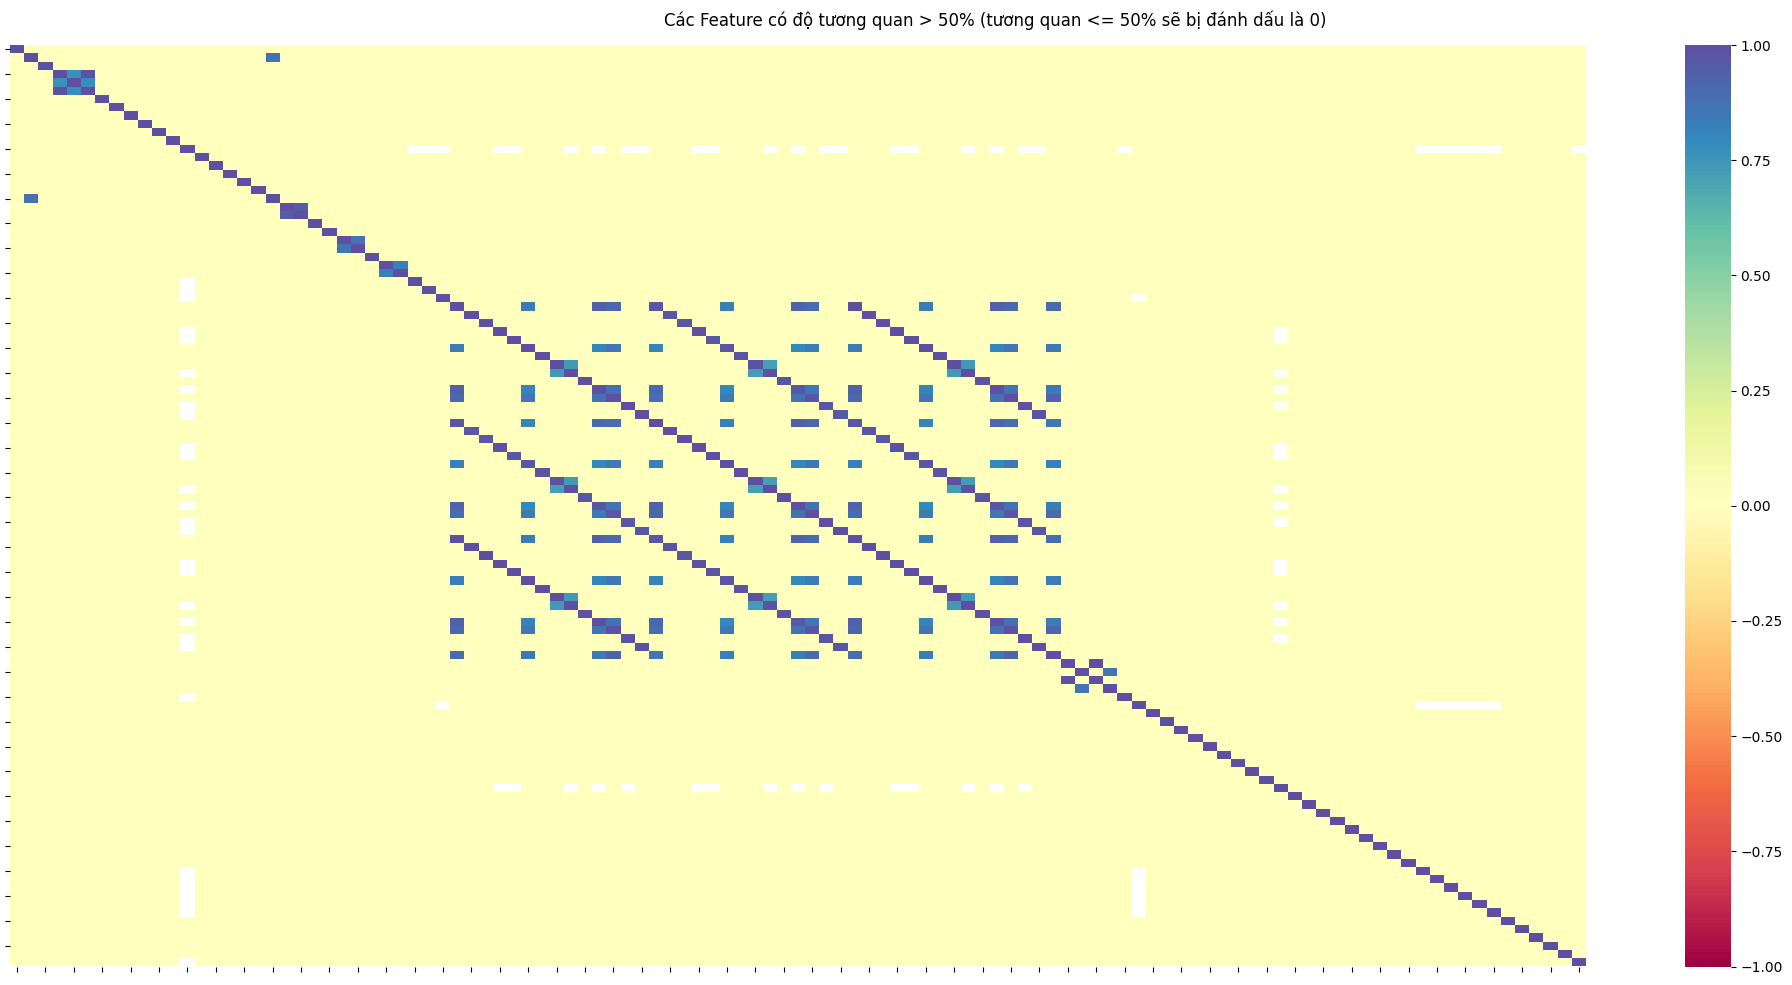

In [9]:
df_temp = train.select_dtypes('number').copy(deep=True)
plt.figure(figsize=(20,10))
sns.heatmap(df_temp.corr().applymap(lambda x: 0 if x < .7 else x), cmap='Spectral', vmin=-1, vmax=1)
plt.xticks(rotation=30)
plt.gca().set_xticklabels([])  # Remove x-tick labels
plt.gca().set_yticklabels([])  # Remove y-tick labels
plt.suptitle(f'Các Feature có độ tương quan > 50% (tương quan <= 50% sẽ bị đánh dấu là 0)')
plt.tight_layout()

In [10]:
df_temp = train.select_dtypes('number').copy(deep=True)
corr_matrix = df_temp.corr()
filtered_corr = df_temp.corr().applymap(lambda x: x if abs(x) > 0.5 and x != 1 else np.nan)

upper_tri = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr_pairs = filtered_corr.where(upper_tri).stack()

# Step 3: Drop one column for each pair of highly correlated features
to_drop = set()
for col1, col2 in high_corr_pairs.index:
    if col1 not in to_drop and col2 not in to_drop:
        to_drop.add(col2)  # Keep col1, drop col2

# Step 4: Drop the identified columns
df_reduced = df_temp.drop(columns=to_drop)

print(f"Columns to drop: {len(to_drop)} - {to_drop}")
print(f"Reduced dataframe shape: {df_reduced.shape}")

Columns to drop: 52 - {'ELEVATORS_AVG', 'ENTRANCES_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'LIVE_REGION_NOT_WORK_REGION', 'LIVINGAREA_MODE', 'YEARS_LAST_PHONE_CHANGE', 'FLOORSMIN_MEDI', 'LANDAREA_MODE', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'LIVINGAPARTMENTS_MODE', 'LIVE_CITY_NOT_WORK_CITY', 'TOTALAREA_MODE', 'ELEVATORS_MODE', 'DAYS_EMPLOYED', 'ENTRANCES_MEDI', 'YEARS_BUILD_MODE', 'NONLIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'YEARS_ID_PUBLISH', 'APARTMENTS_MODE', 'AMT_ANNUITY', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'REGION_RATING_CLIENT_W_CITY', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MEDI', 'APARTMENTS_MEDI', 'ENTRANCES_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'YEARS_REGISTRATION', 'COMMONAREA_AVG', 'FLAG_EMP_PHONE', 'COMMONAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMIN_MODE', 'COMMONAREA_MEDI', 'YEARS_

C:\Users\trong\AppData\Local\Temp\ipykernel_23712\190933972.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_corr = df_temp.corr().applymap(lambda x: x if abs(x) > 0.5 and x != 1 else np.nan)
